In [1]:
import numpy as np
import gym
from pg import *
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from IPython.display import display
import time

In [2]:
% load_ext autoreload
% autoreload 2 

### Displaying frames inline

In [3]:
def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))


# CartPole 

INFO:gym.envs.registration:Making new env: CartPole-v0
[2016-07-30 21:45:05,608] Making new env: CartPole-v0


The average reward for the policy is 200.0 in 1000 trials


Time spent in training is 93.149945


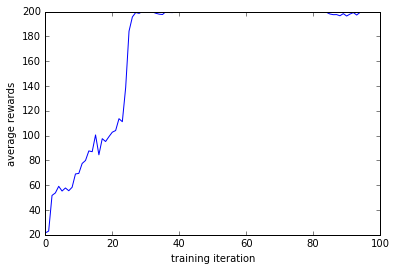

In [24]:
t1 = time.clock()
# Creating a CartPole Environment
env = gym.make('CartPole-v0')
n_itr = 100
# Creating a softmax policy
ob_dim = env.observation_space.shape[0]
ac_dim = env.action_space.n
linearPolicy = StochasticLinearPolicy(ob_dim, ac_dim)
baseline = LinearFeatureBaseline_rllab()
# Creating the REINFORCE Algorithm and training it
vpg = VPG(env, linearPolicy, None, n_itr = n_itr, batch_size = 50, max_pathlength = 200, learning_rate = 0.5, 
         gradient_update="adam")
rewards = vpg.train()
print vpg.accuracy(1000)
print "\n"
print "Time spent in training is {0}".format(time.clock()-t1)
plt.plot(np.arange(n_itr), rewards)
plt.xlabel("training iteration")
plt.ylabel("average rewards")

rewards obtained = 500.0



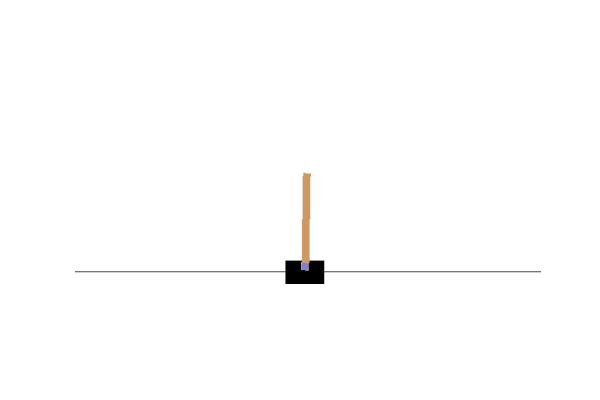
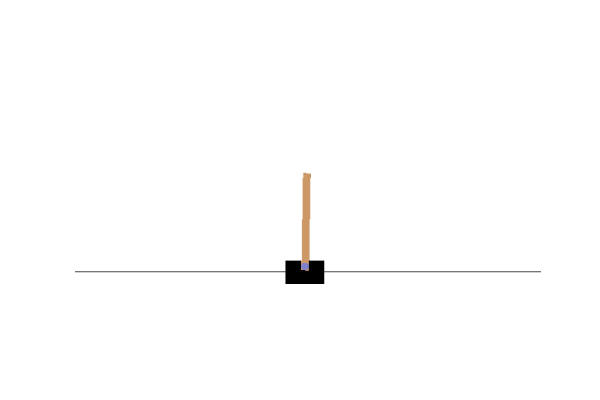
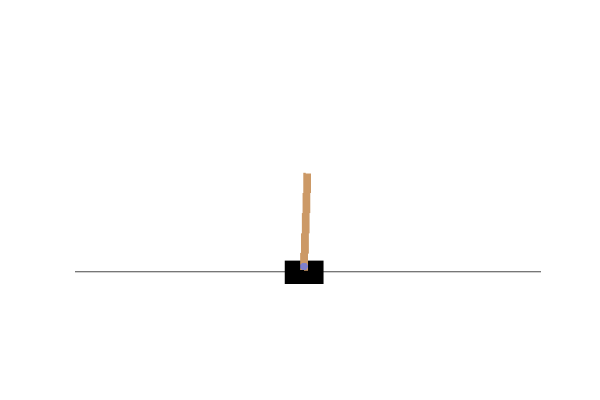
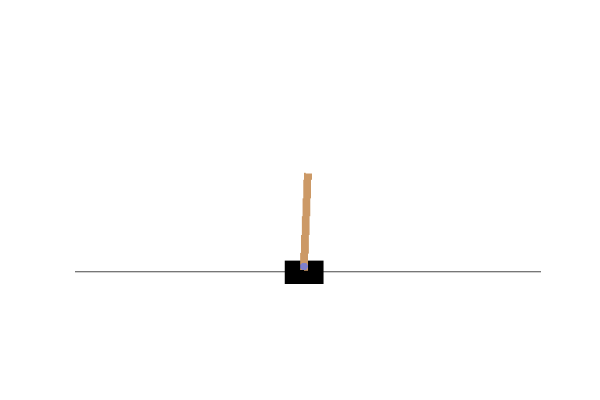
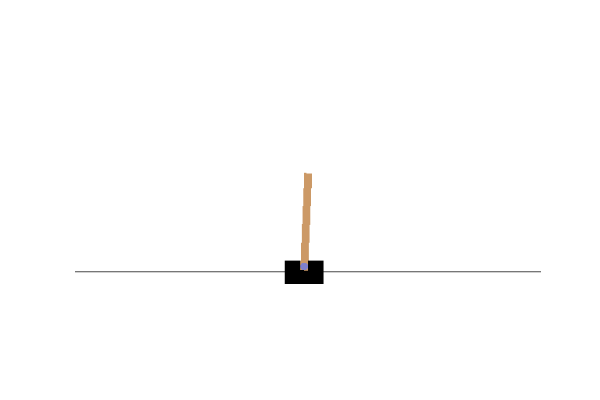
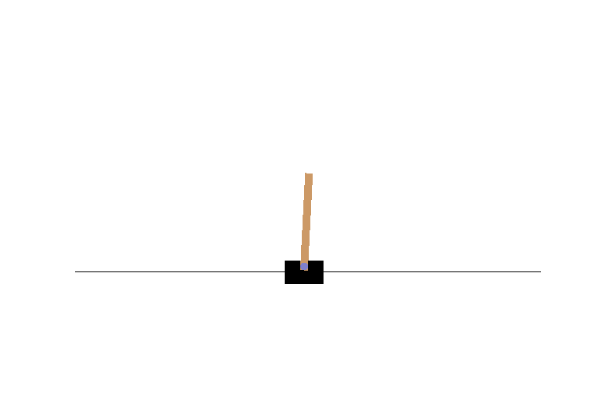
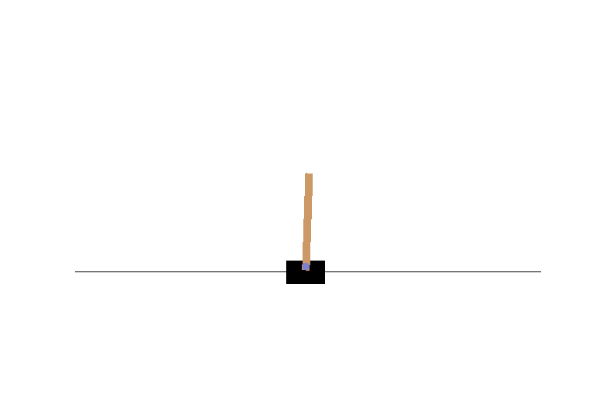
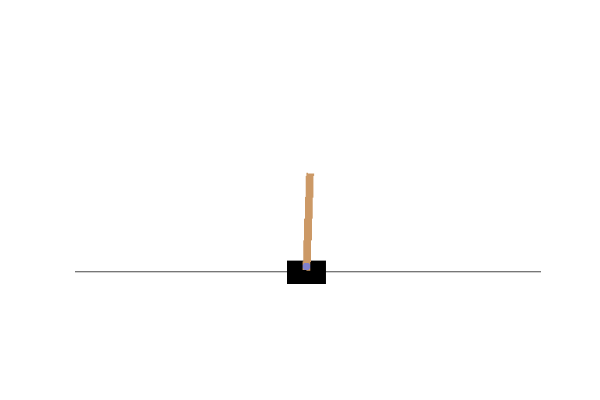
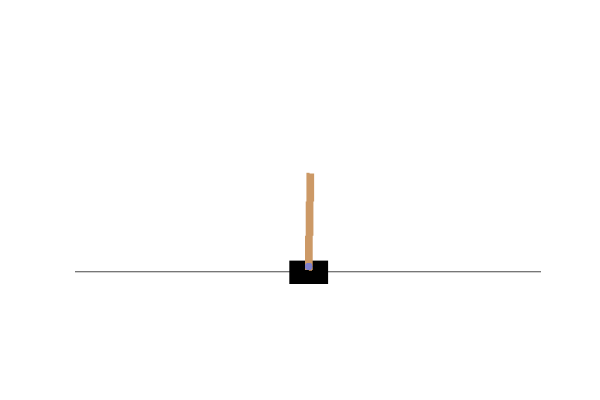
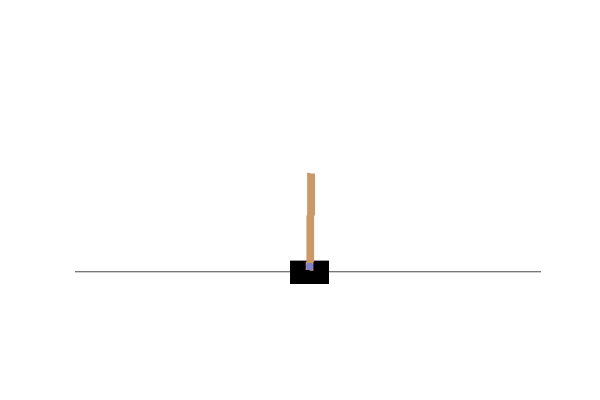
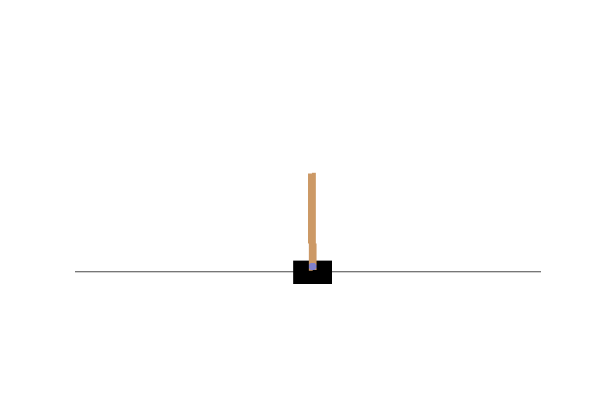
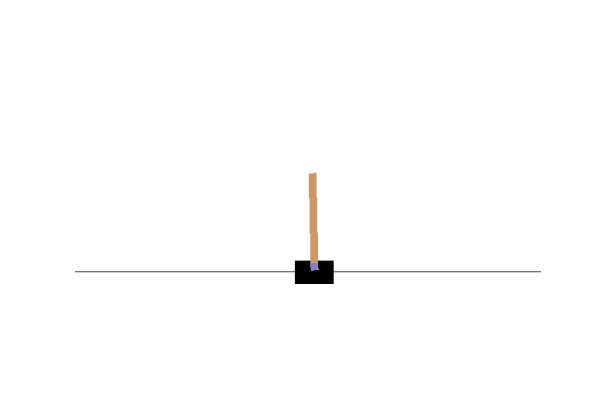
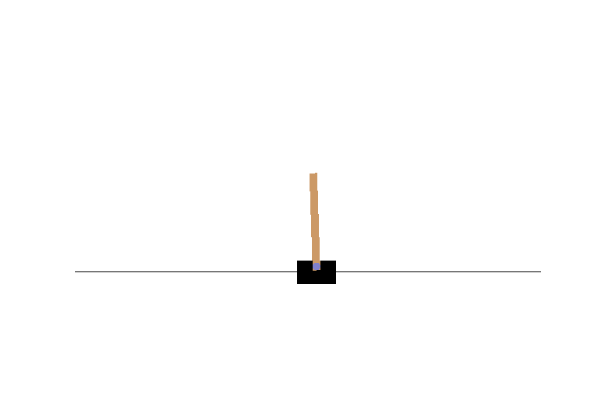
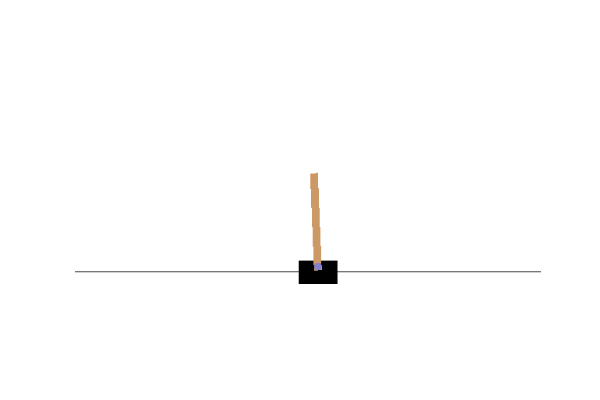
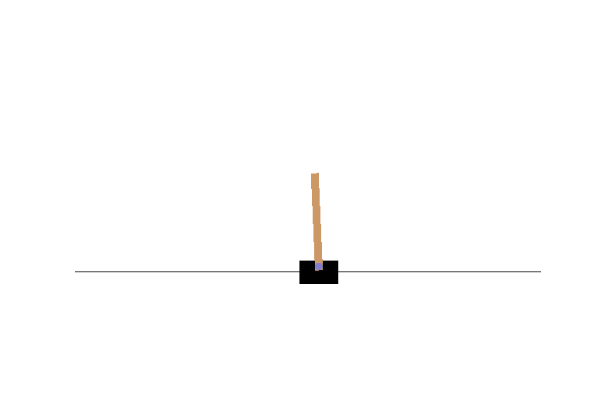
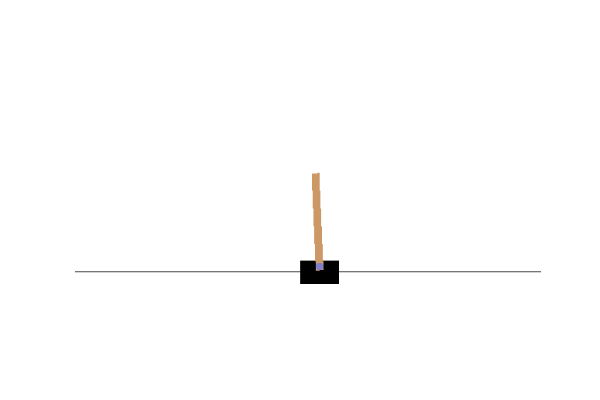
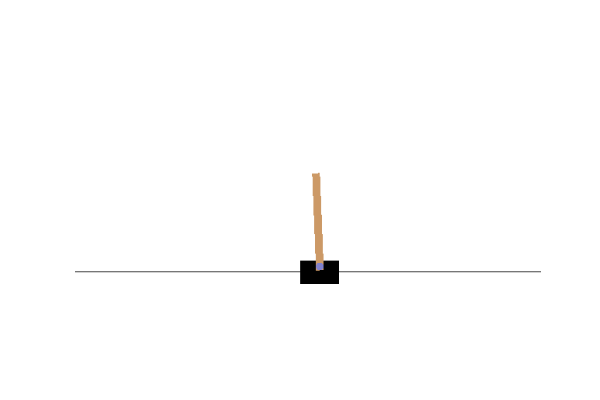
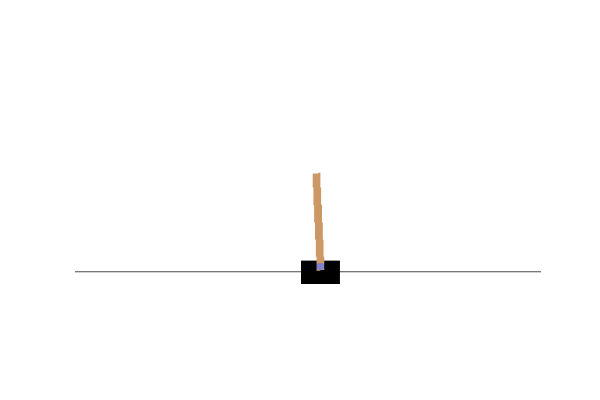
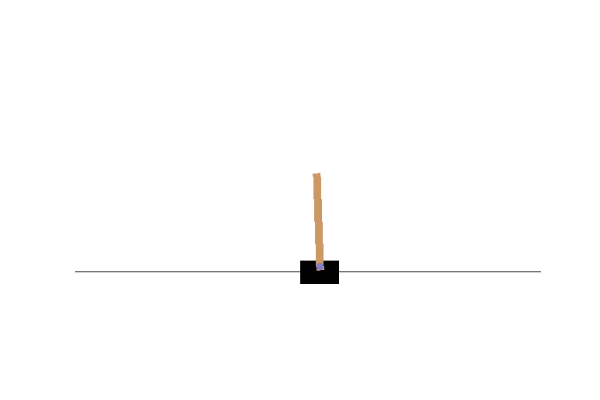
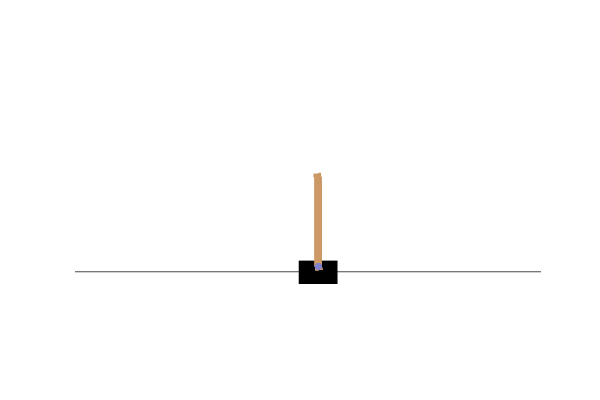
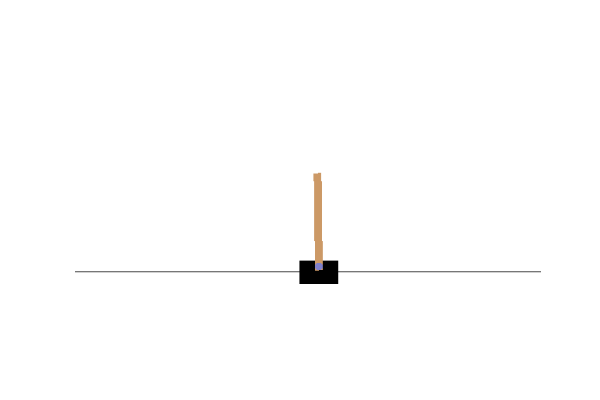
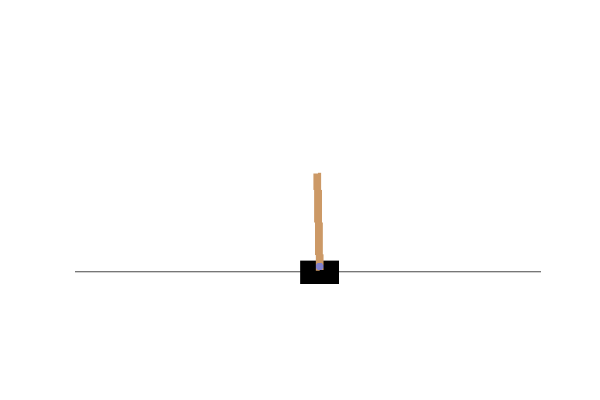
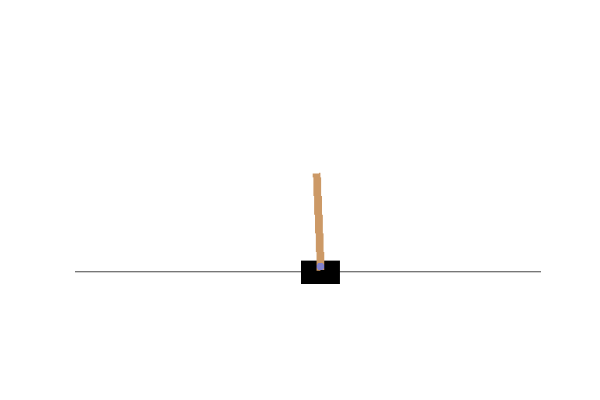
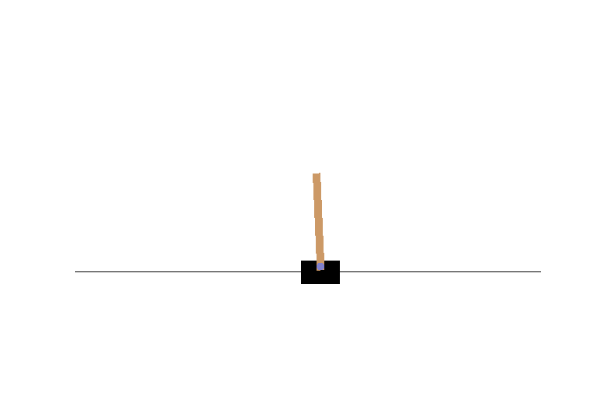
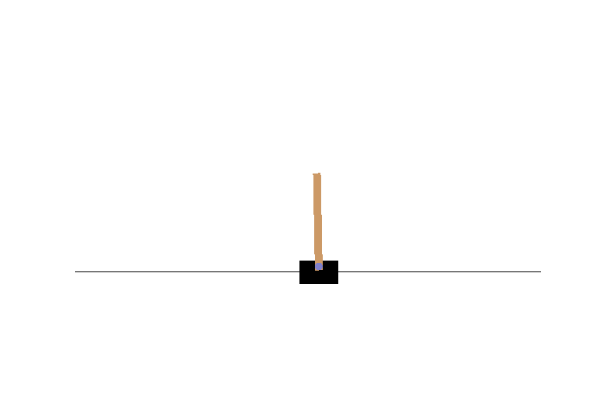
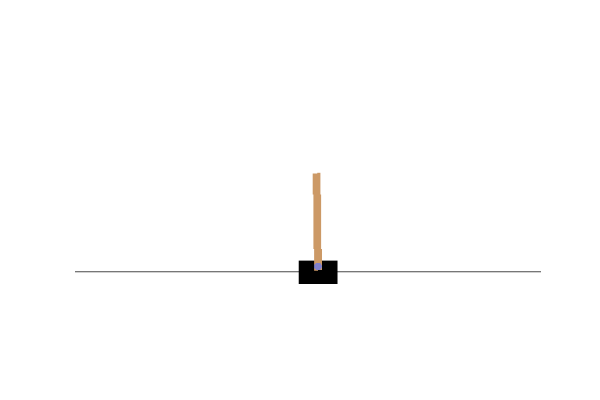
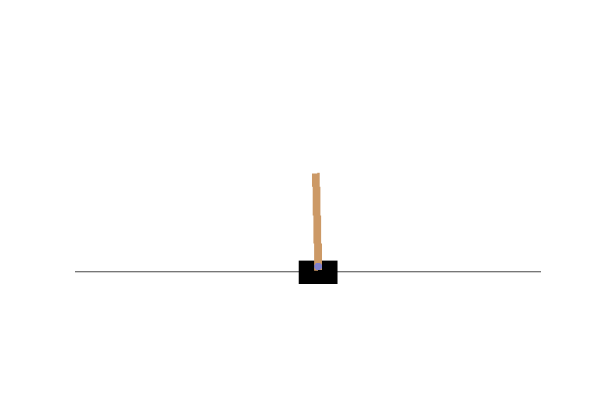
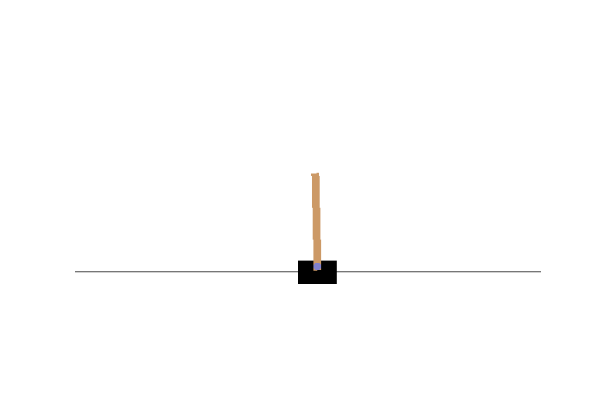
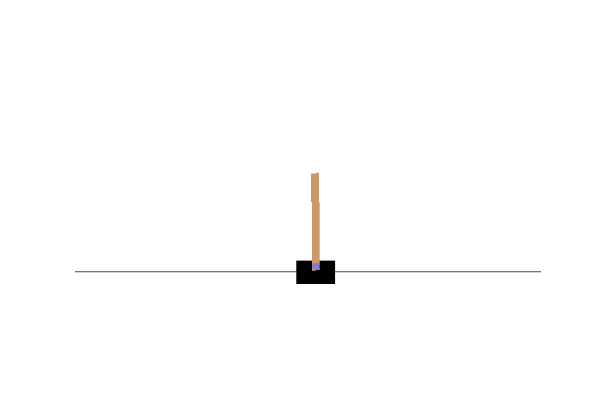
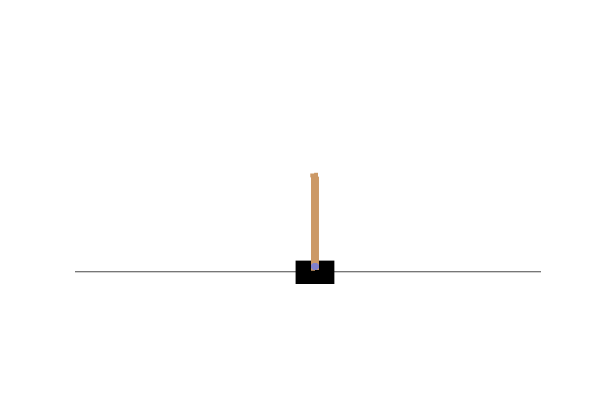
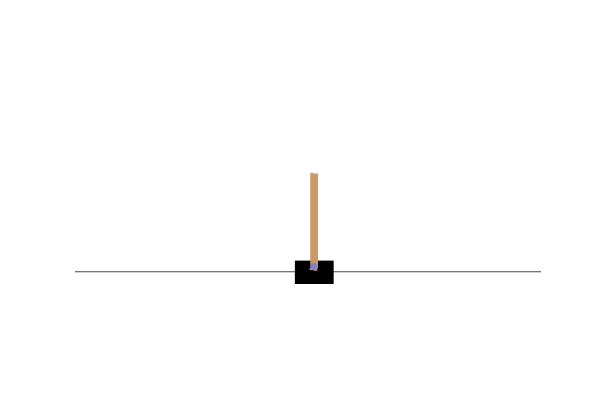
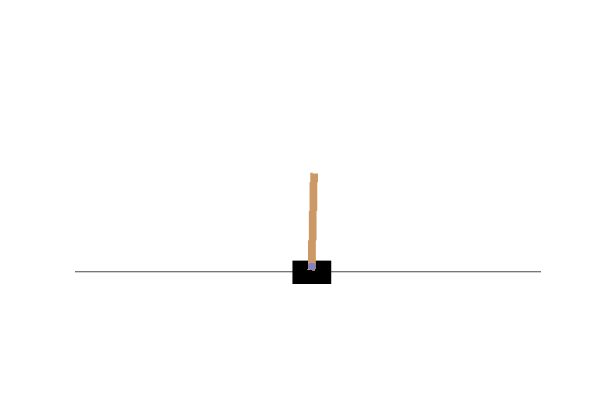
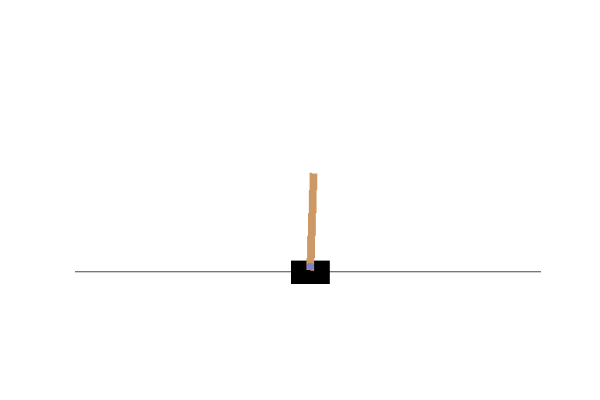
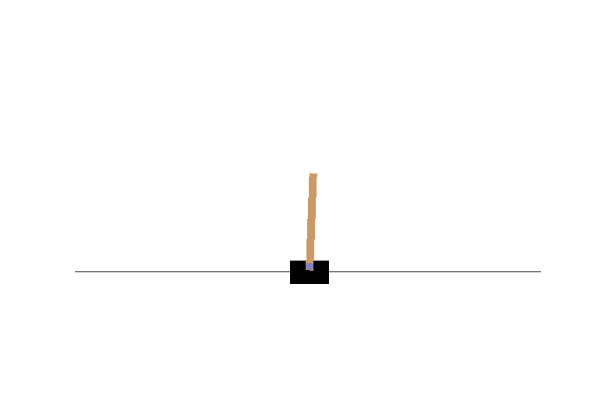
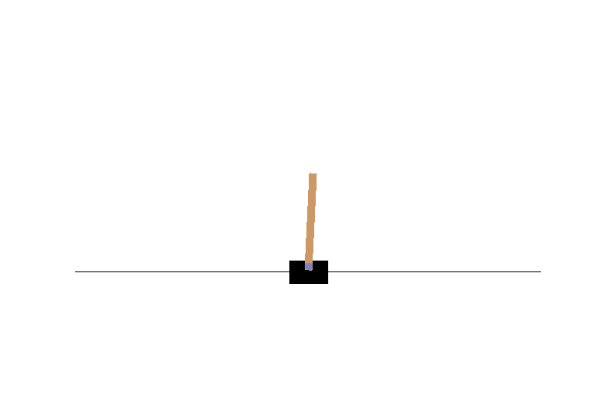
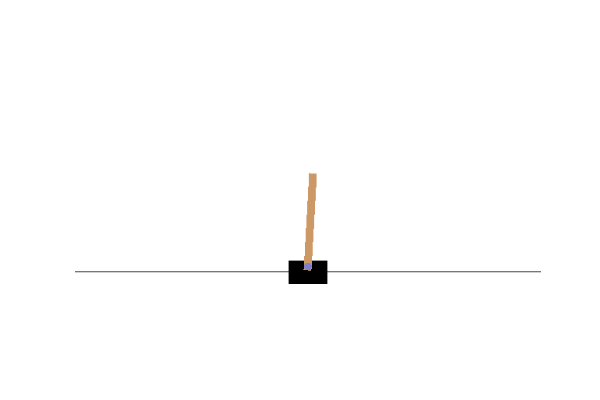
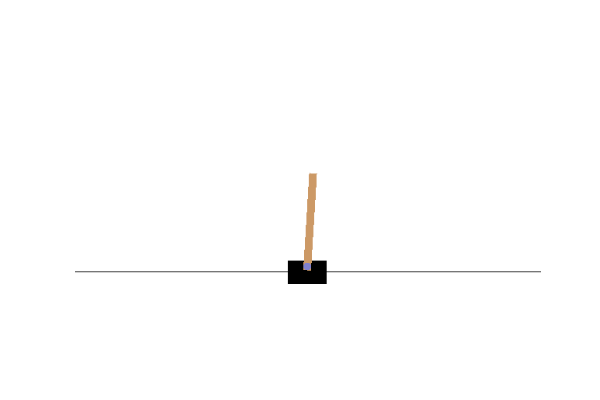
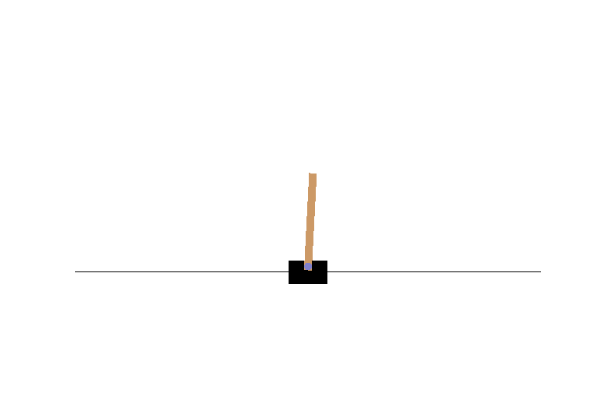
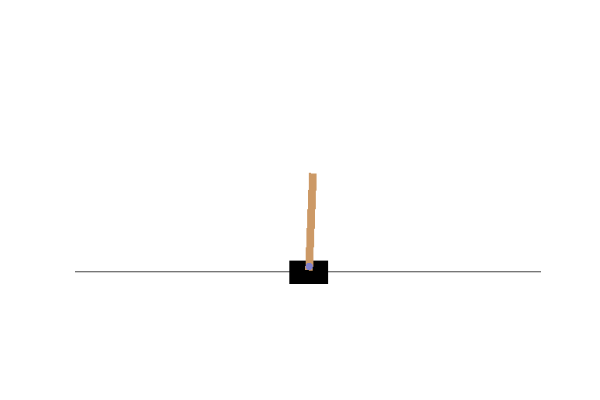
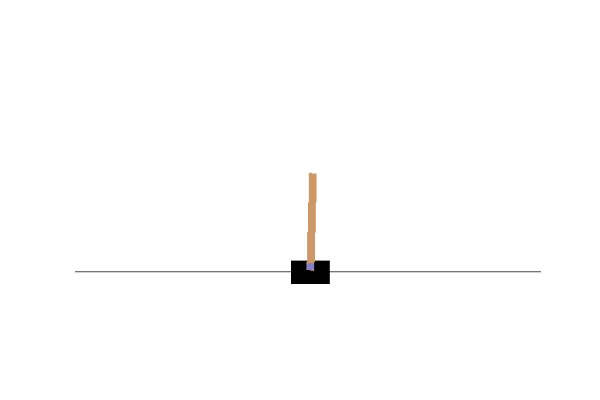
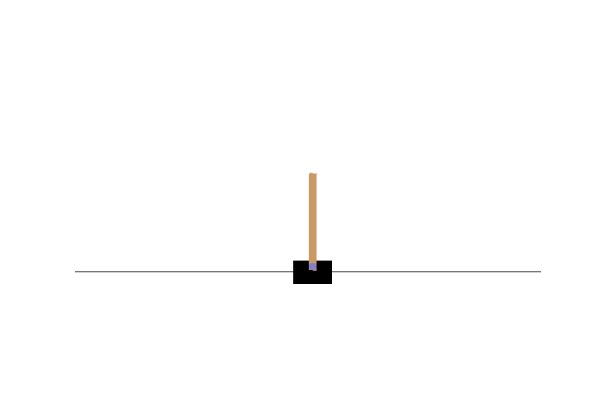
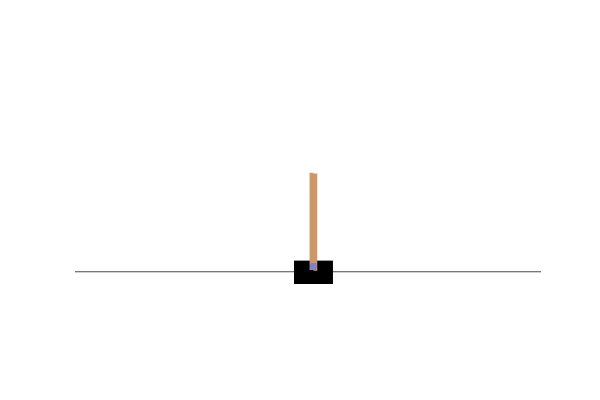
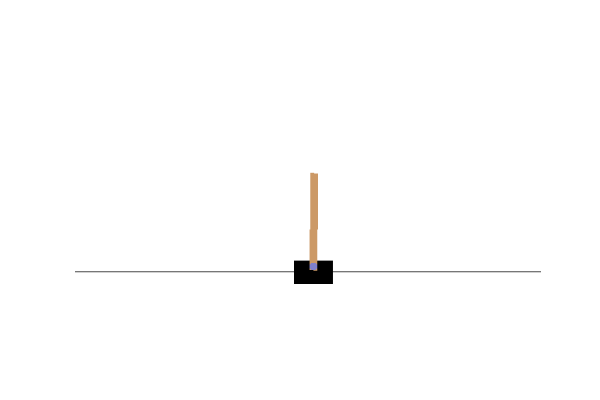
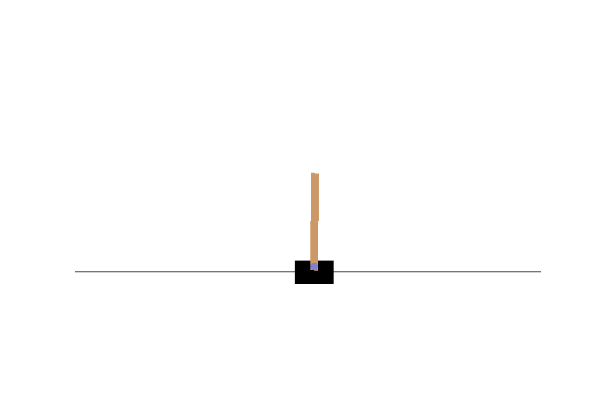
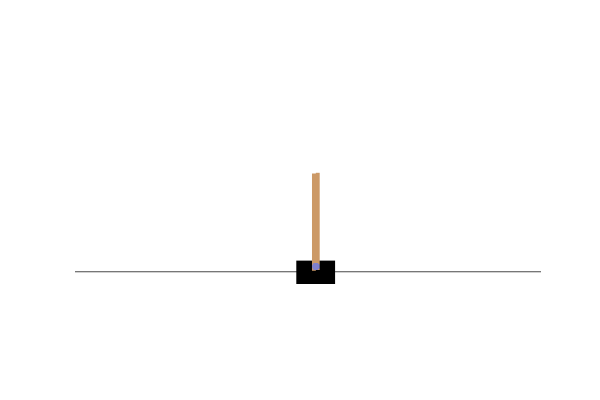
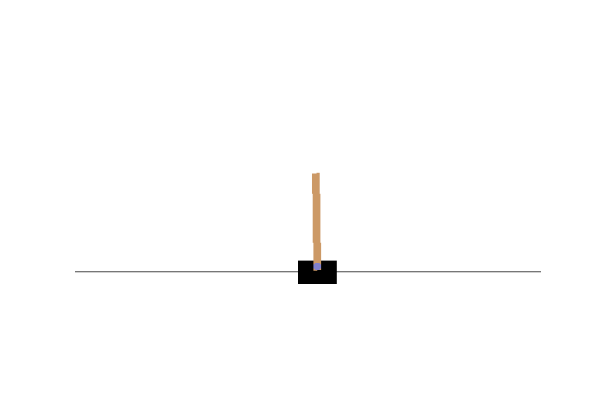
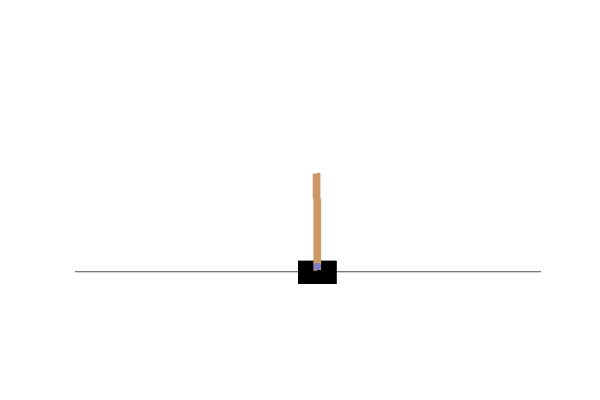
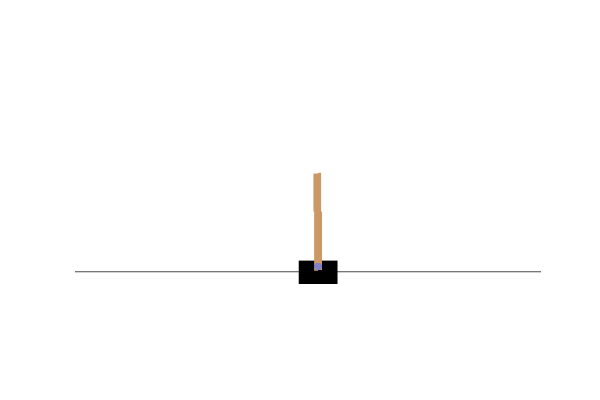
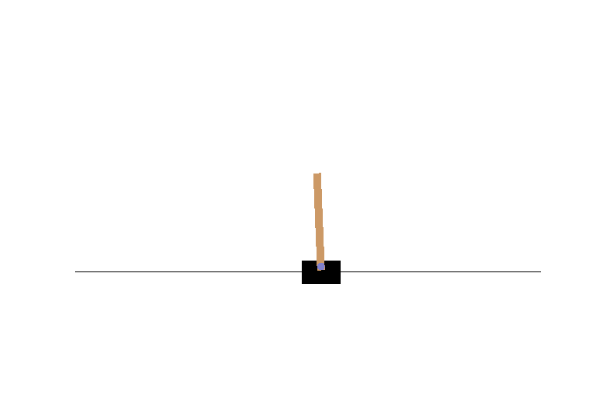
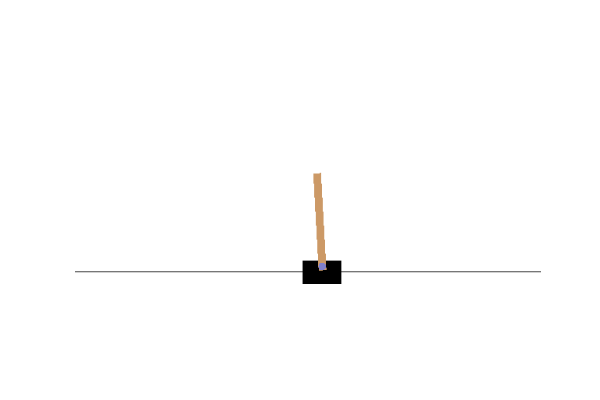
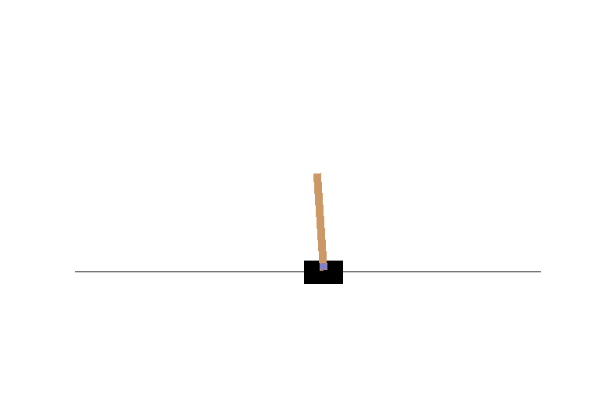
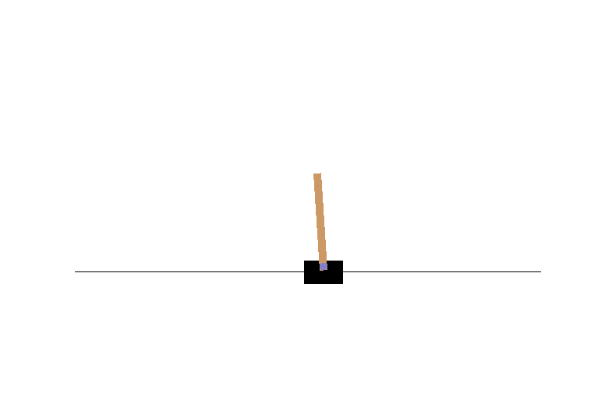
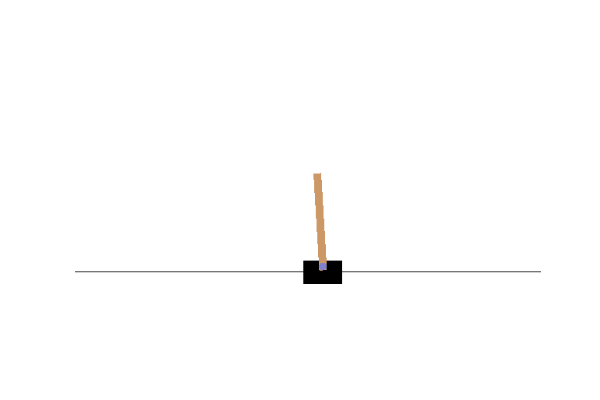
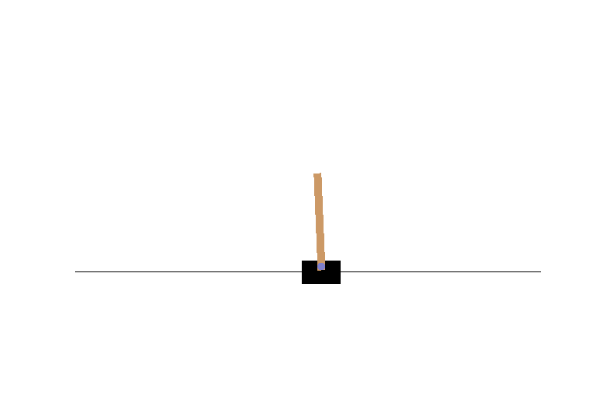
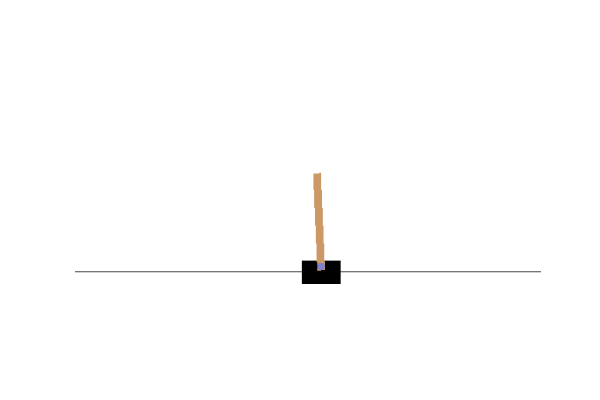
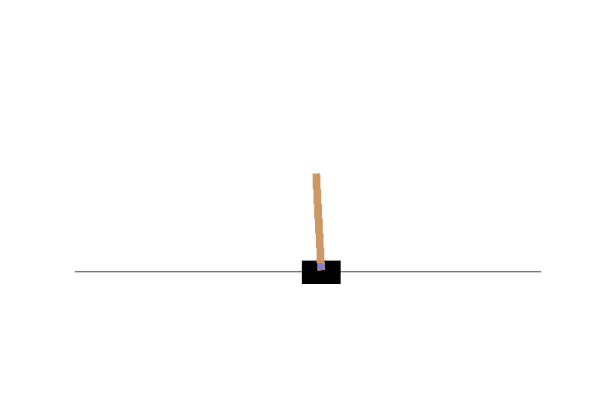
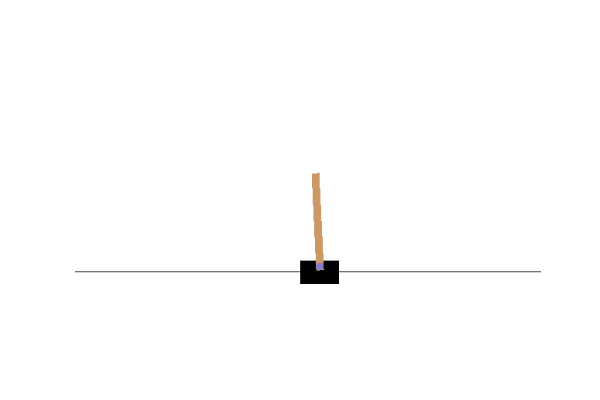
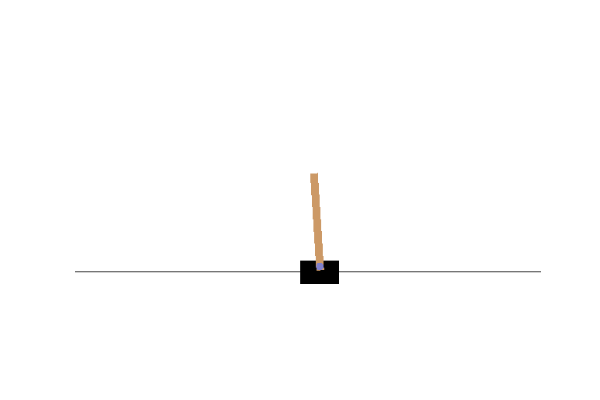
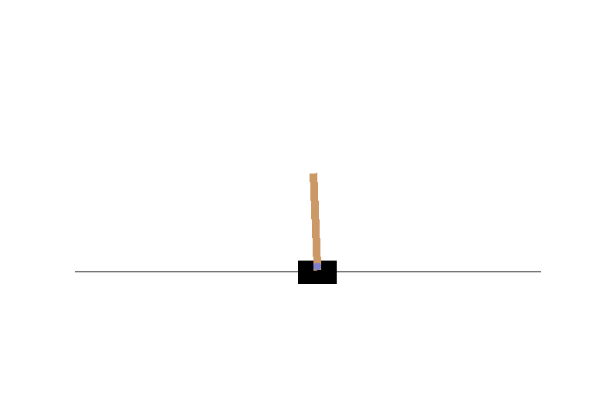
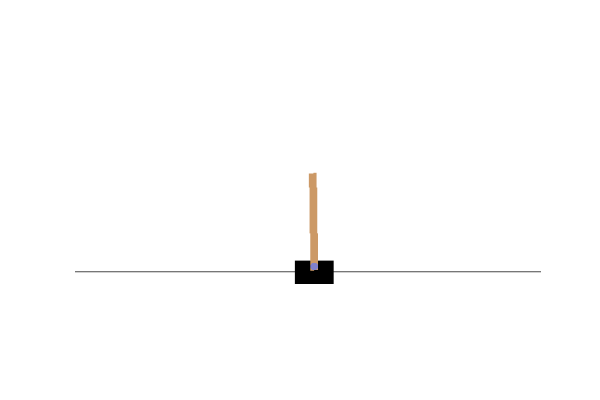
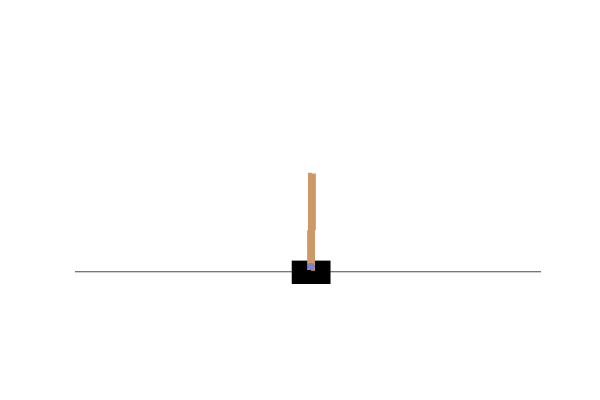
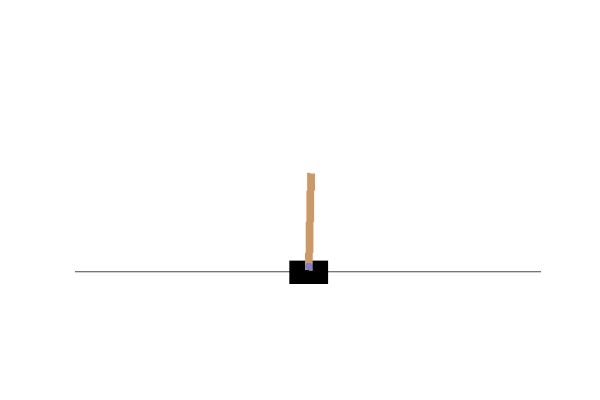
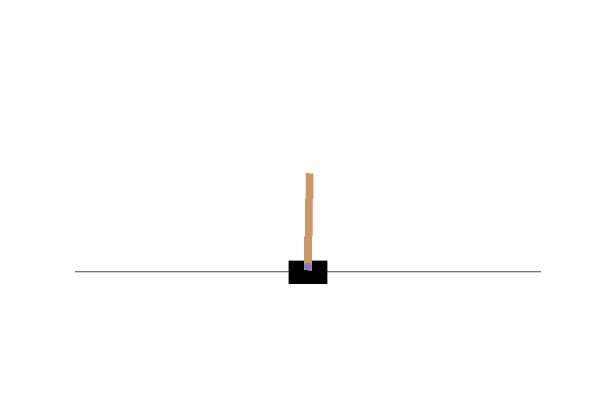
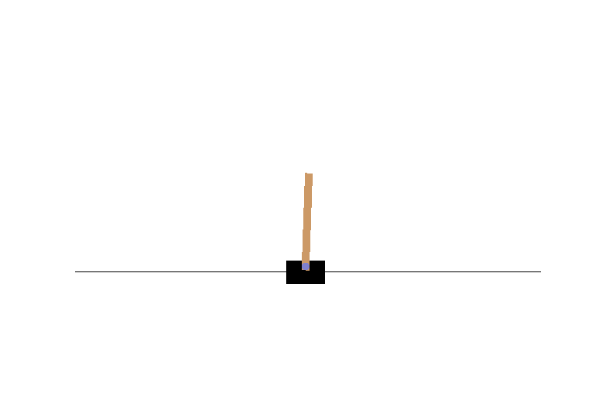
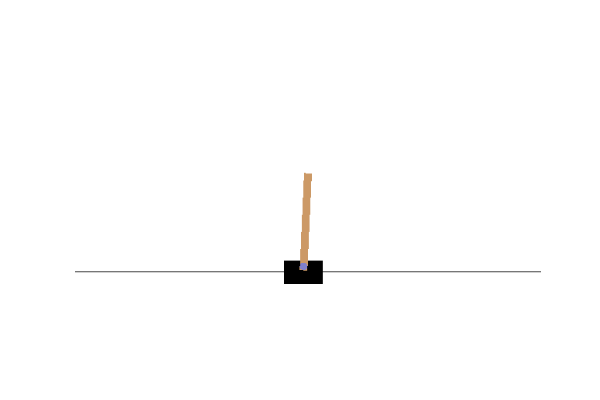
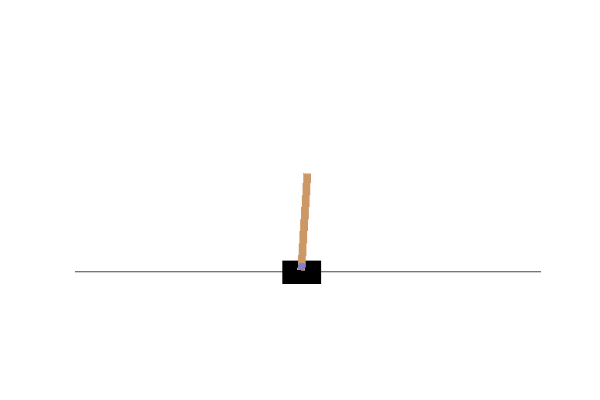
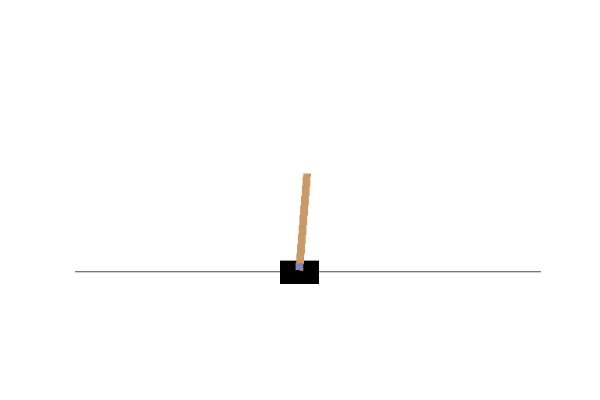
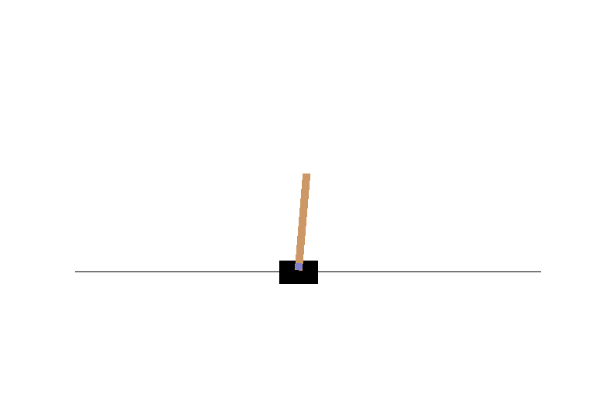
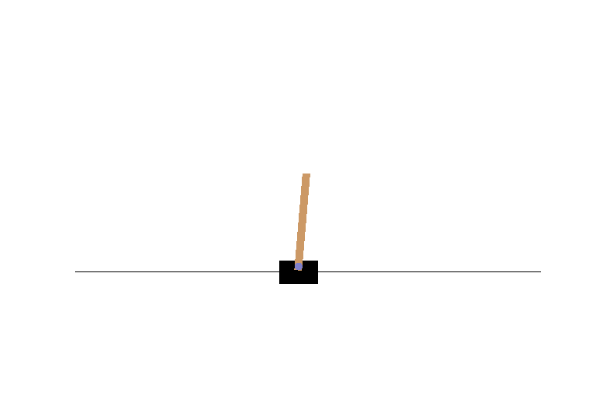
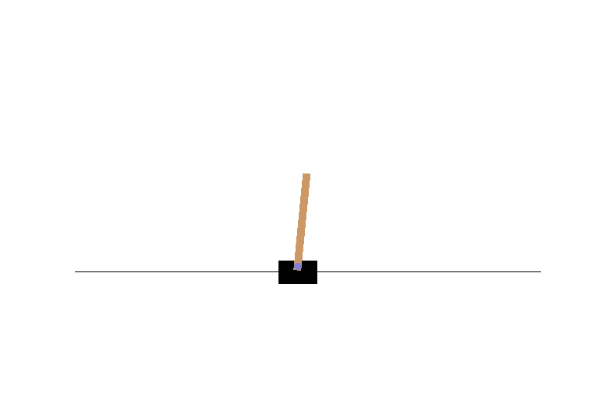
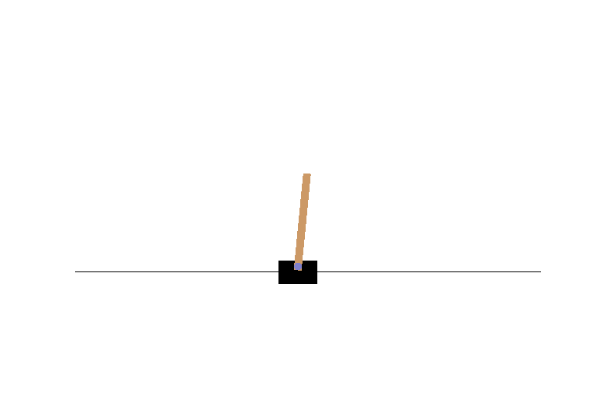
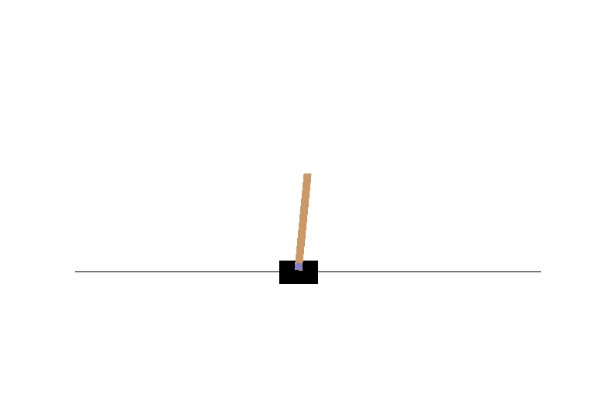
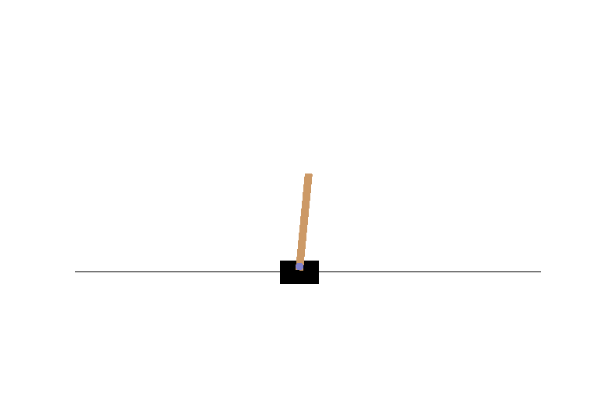
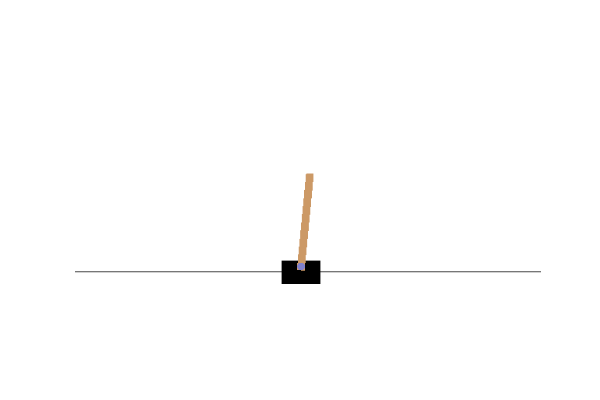
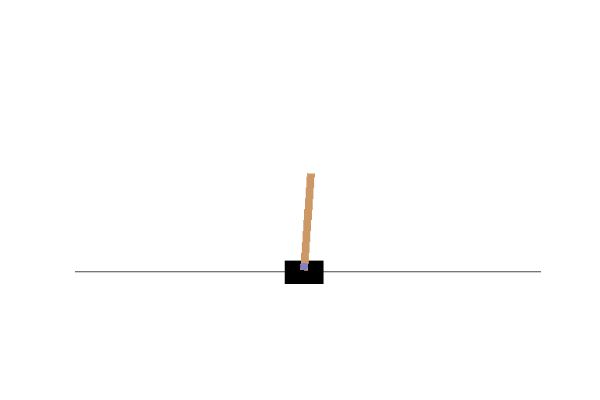
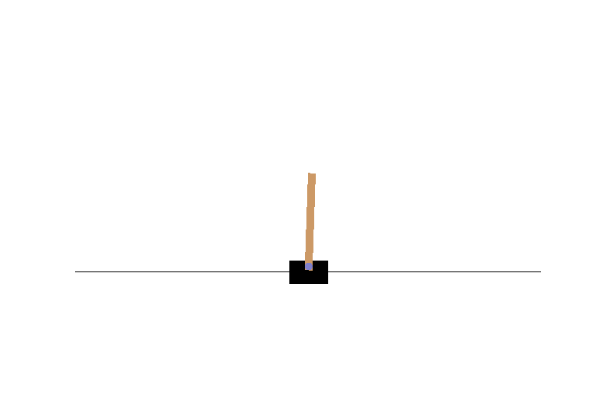
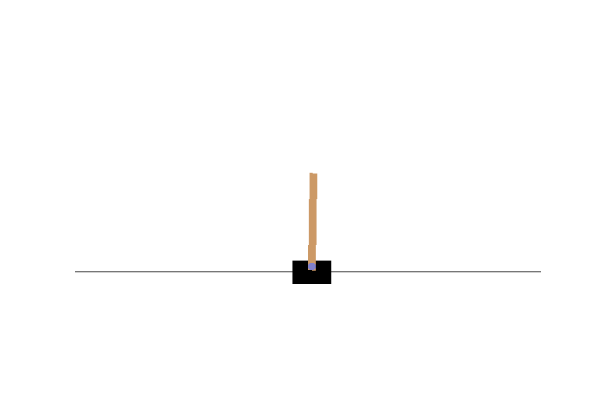
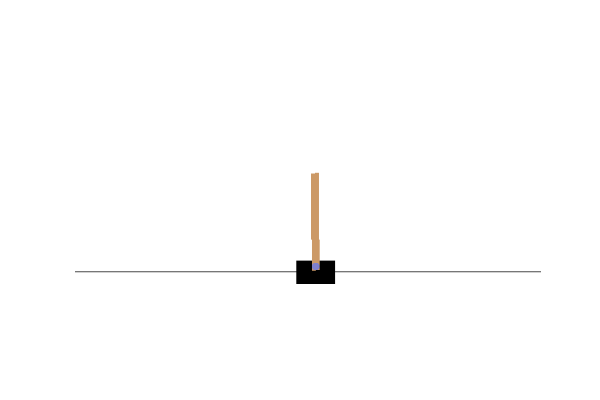
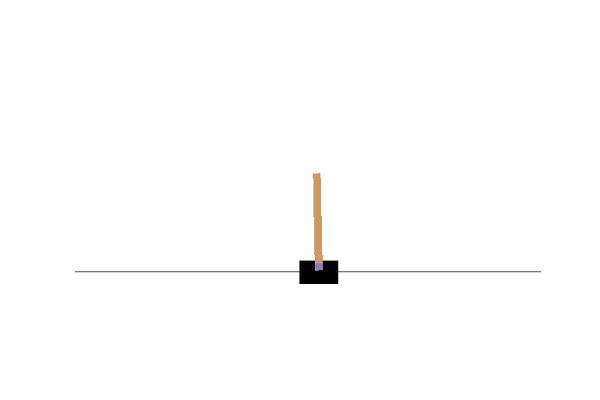
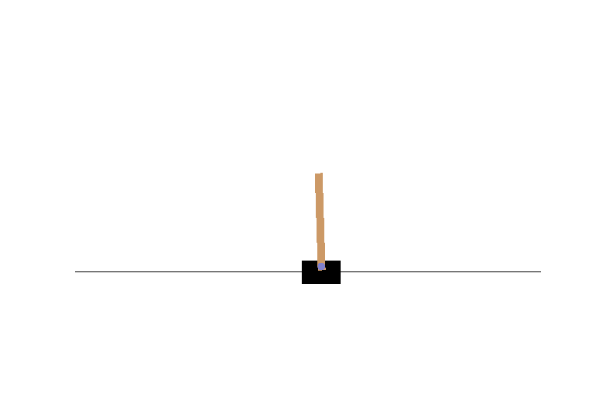
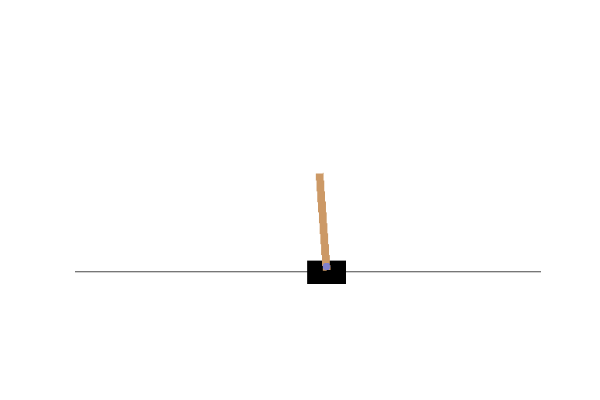
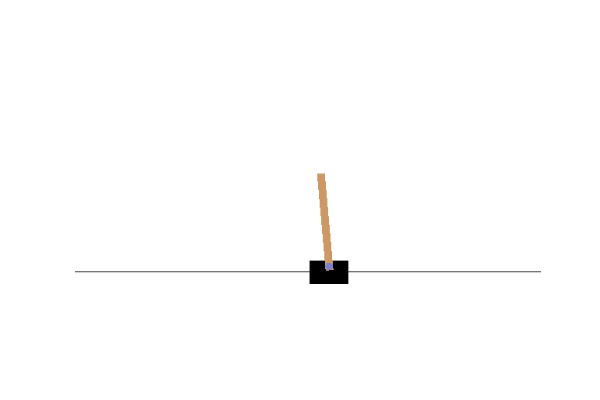
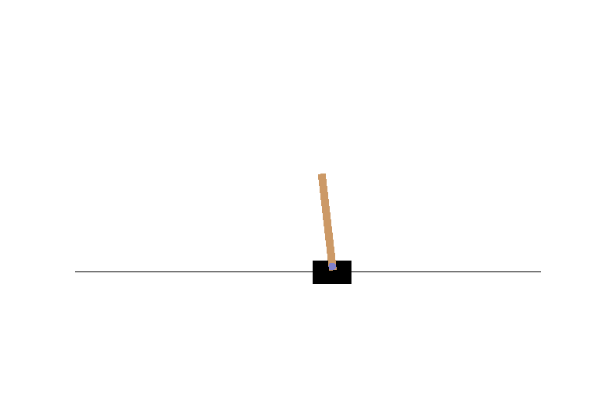
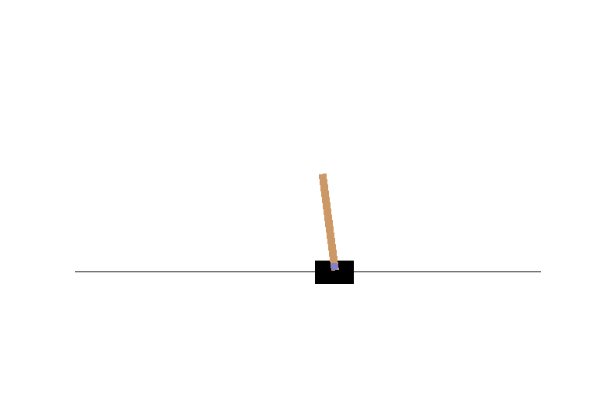
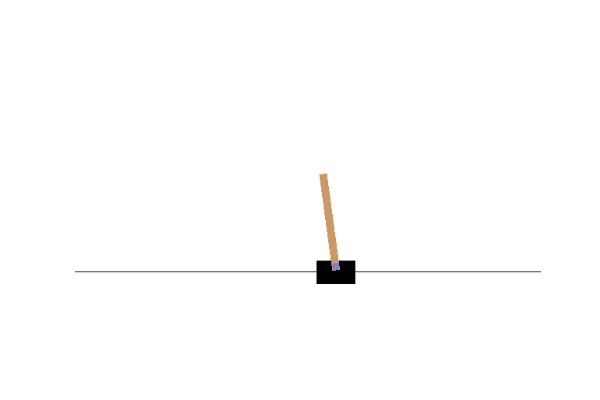
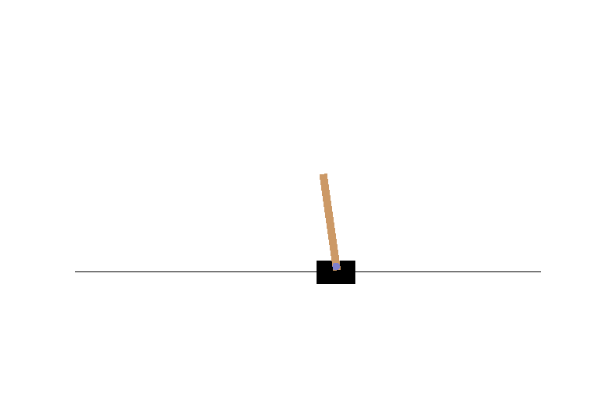
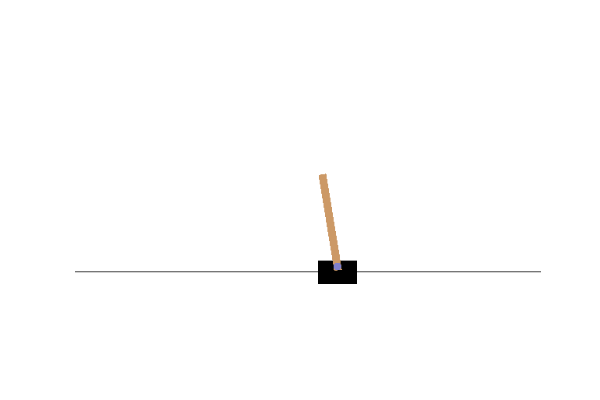
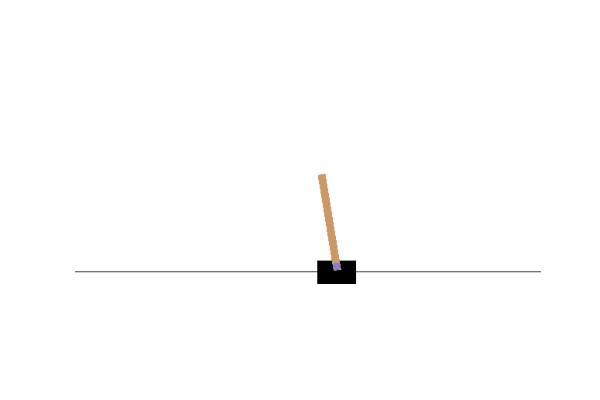
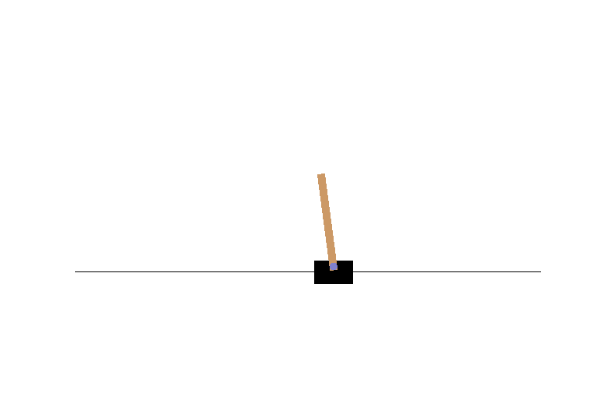
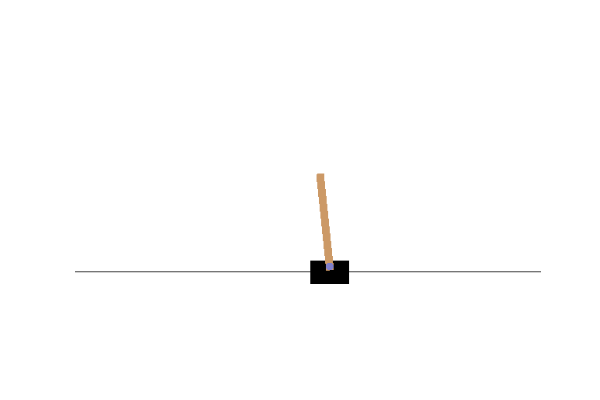
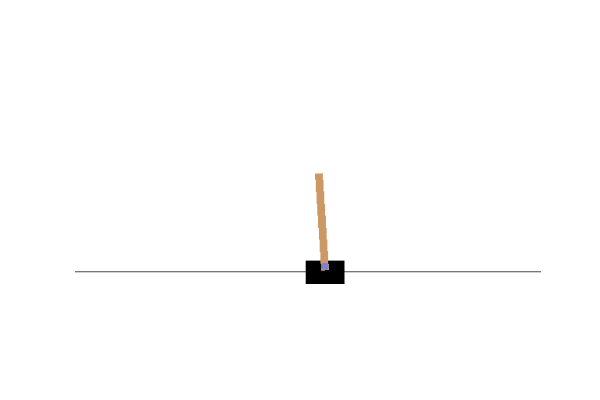
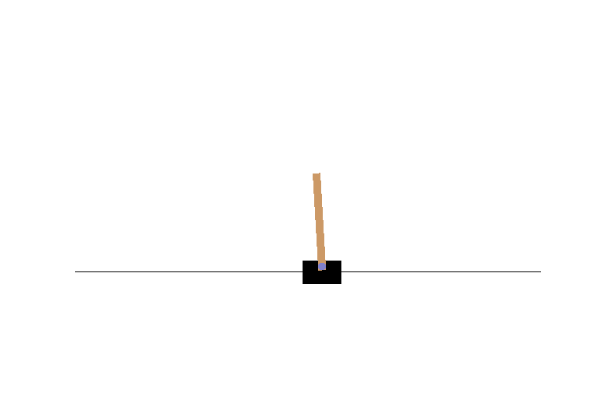
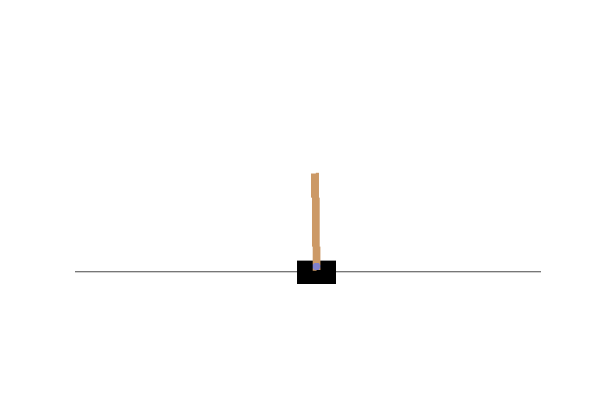
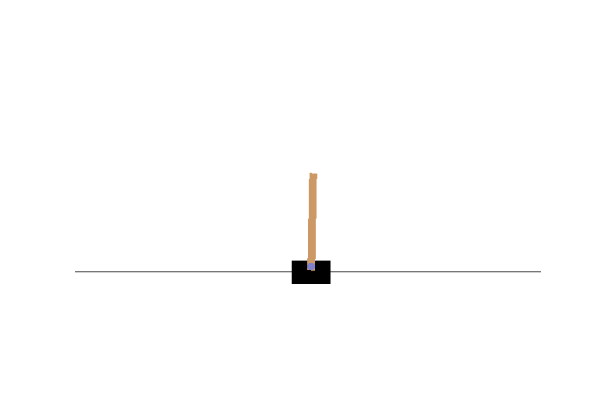
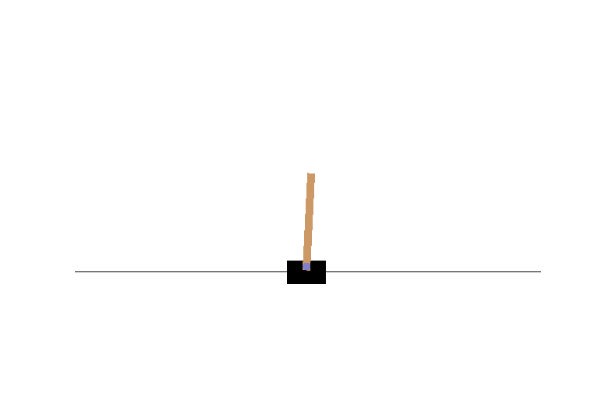
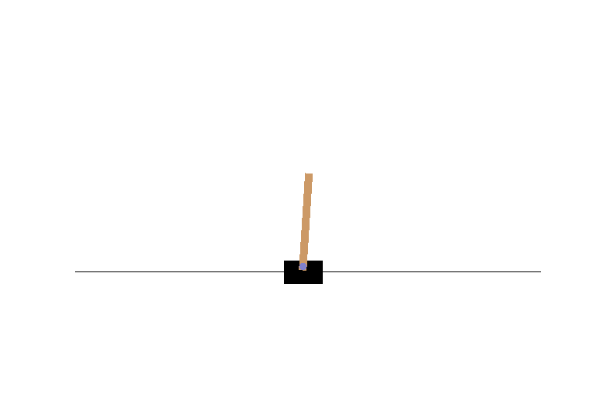
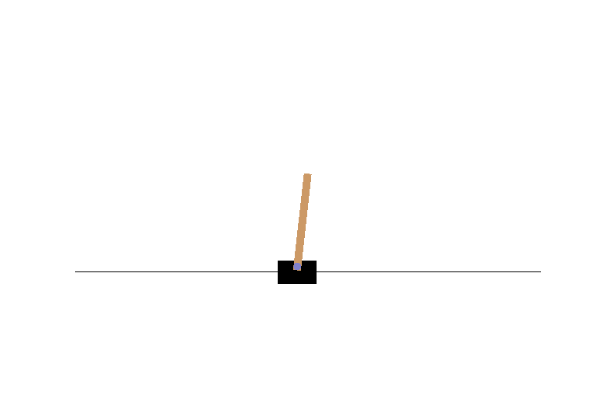
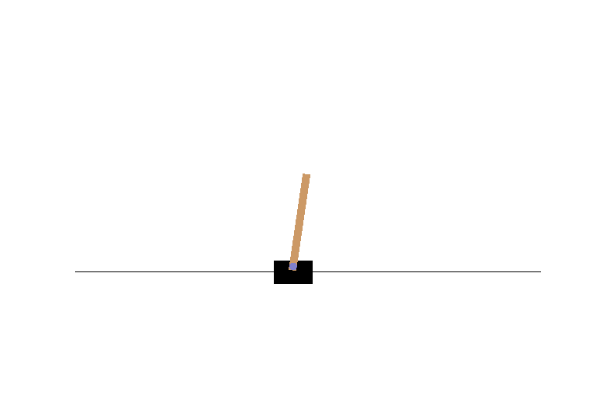
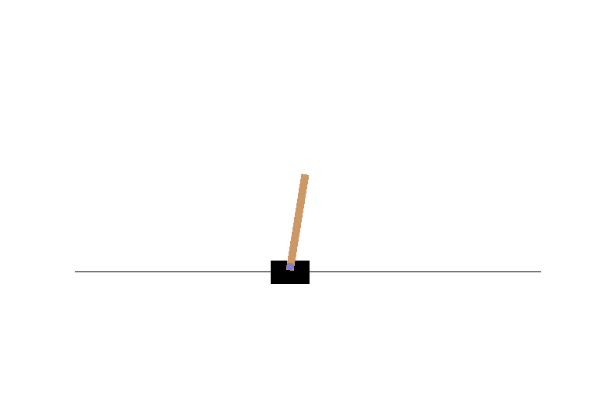
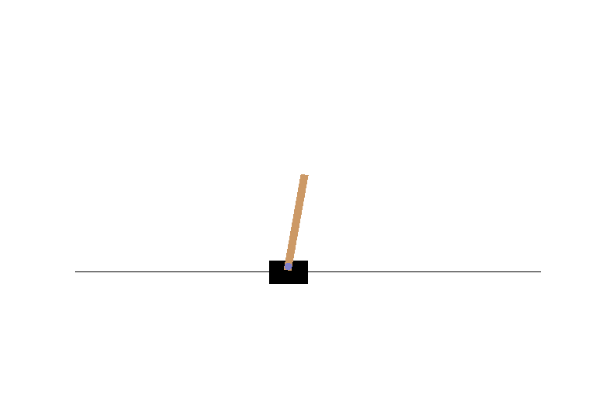
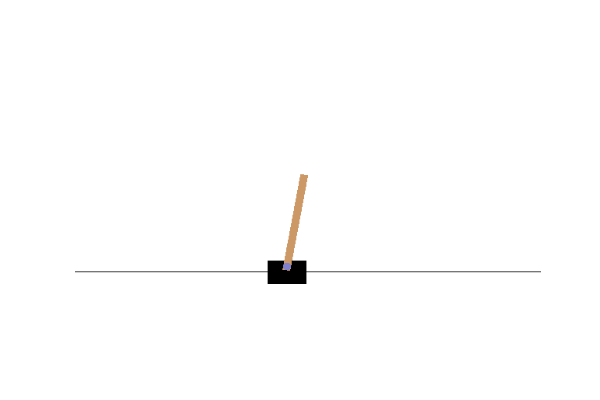
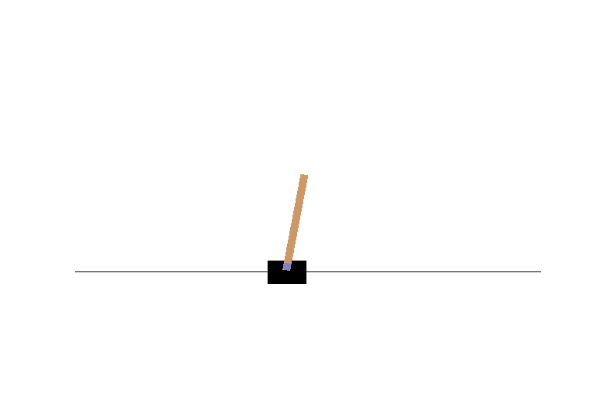
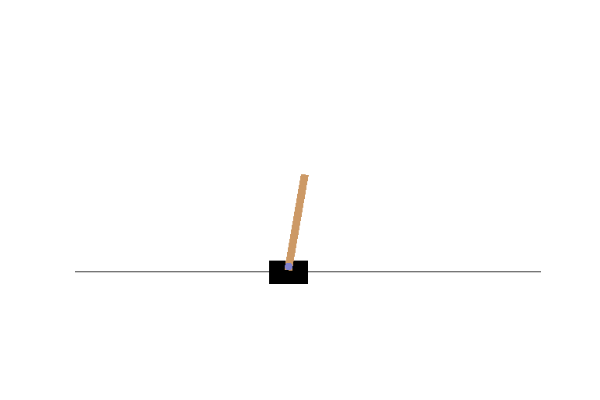
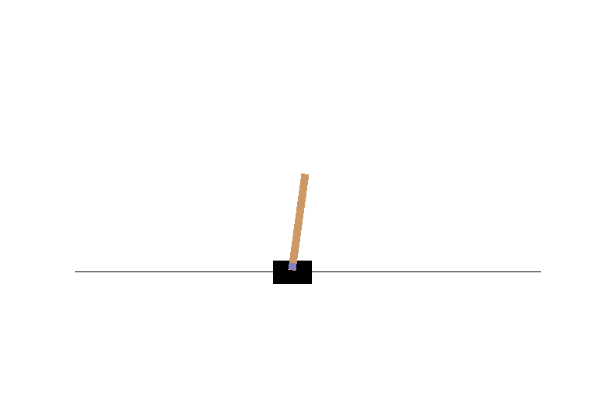
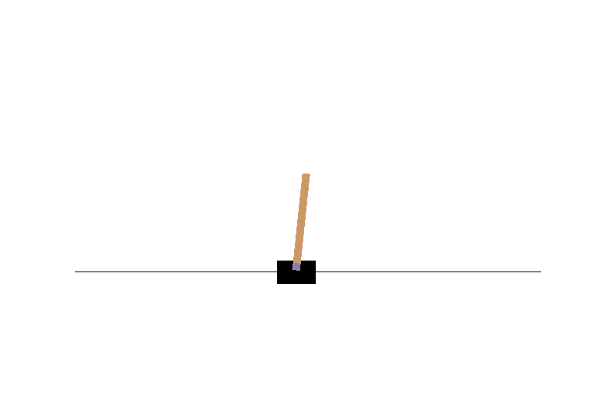
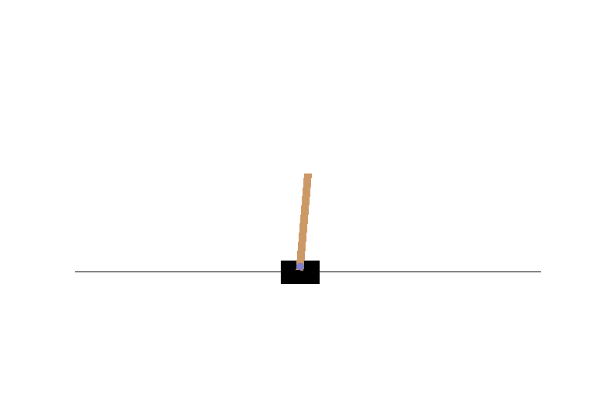
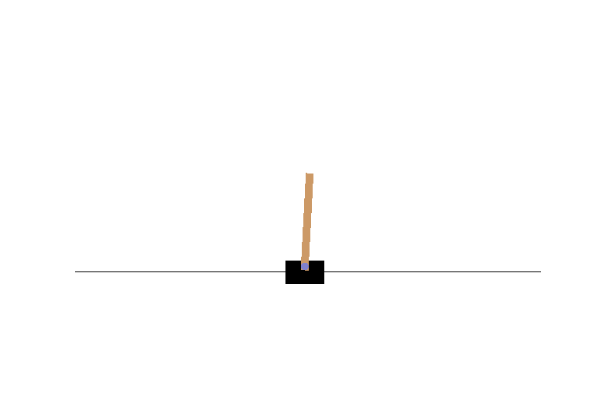
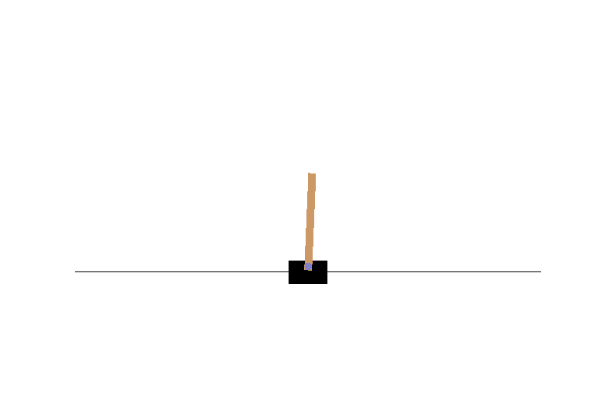
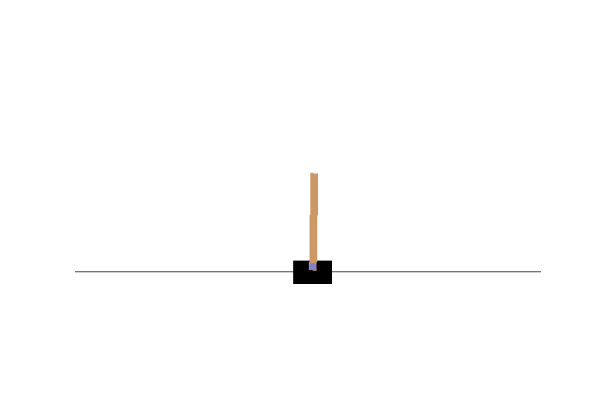
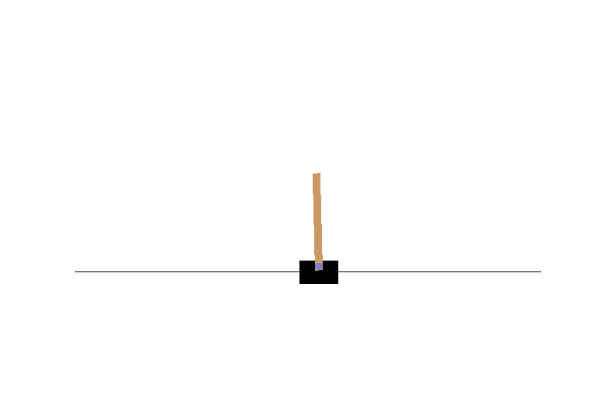
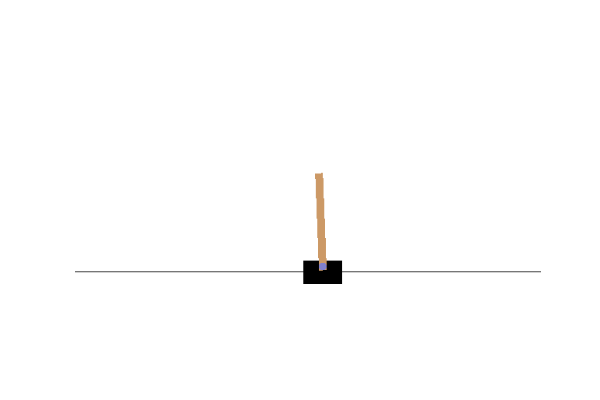
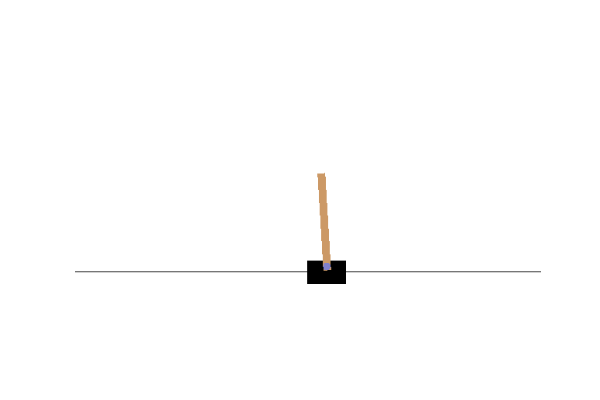
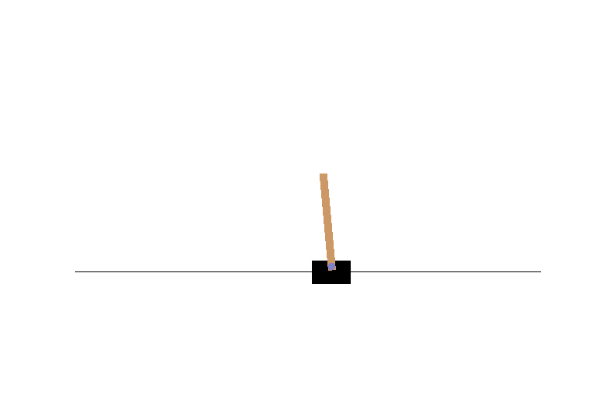
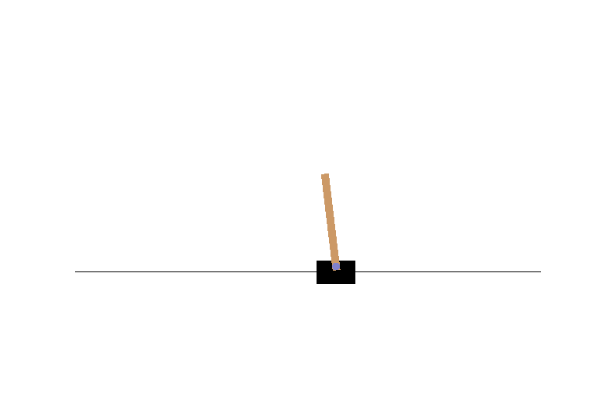
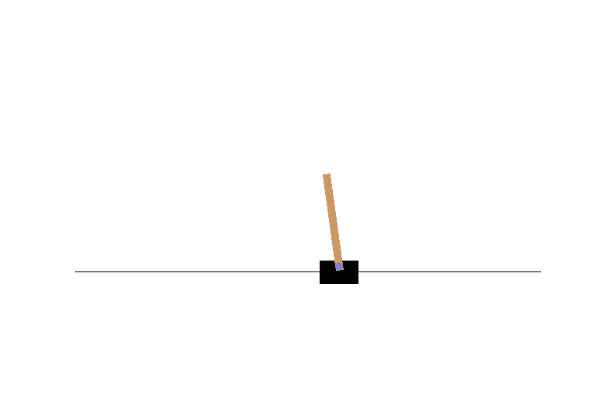
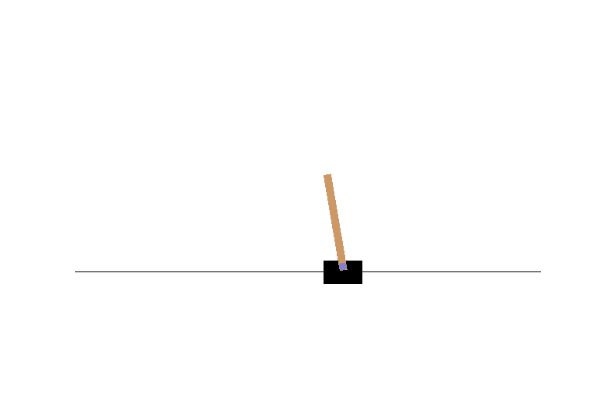
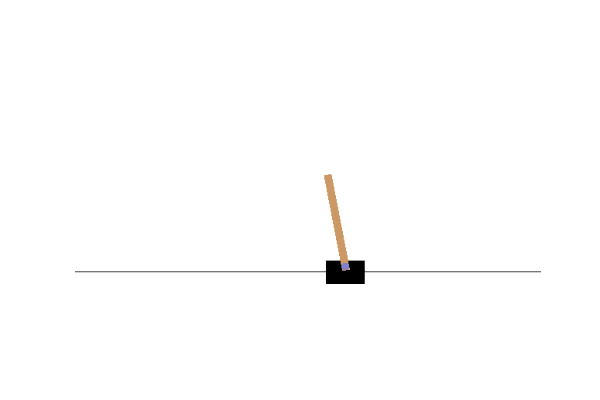
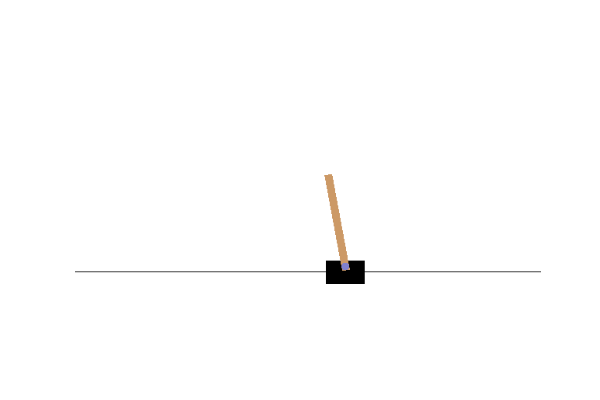
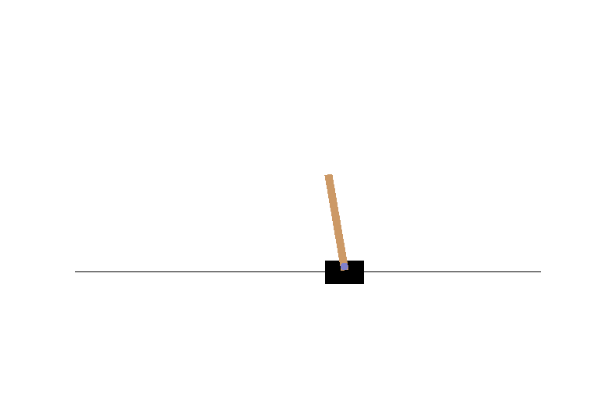
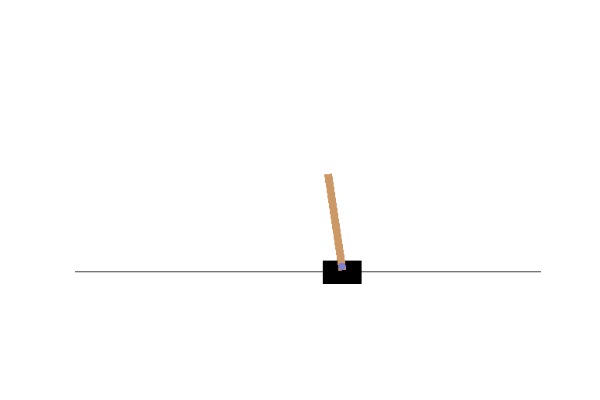
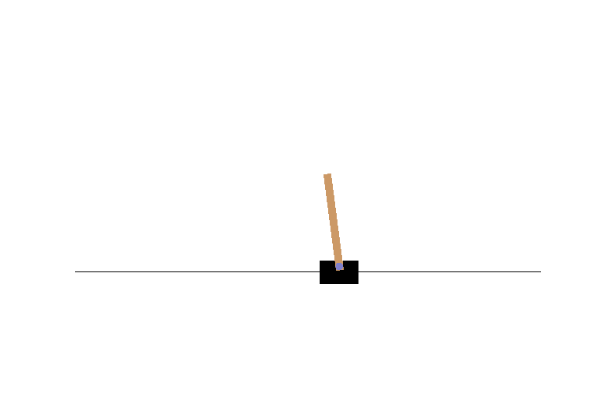
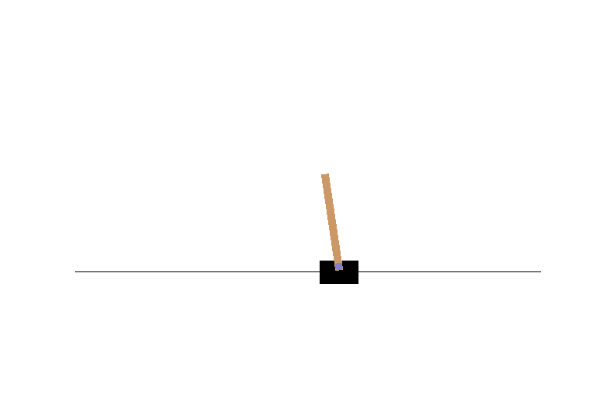
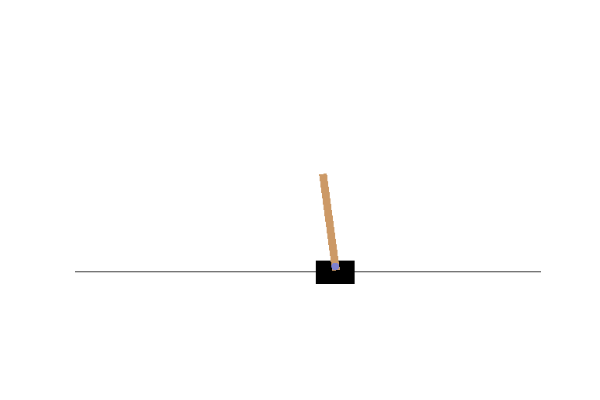
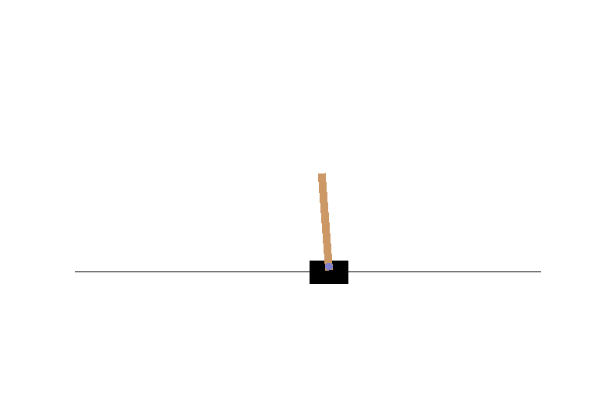
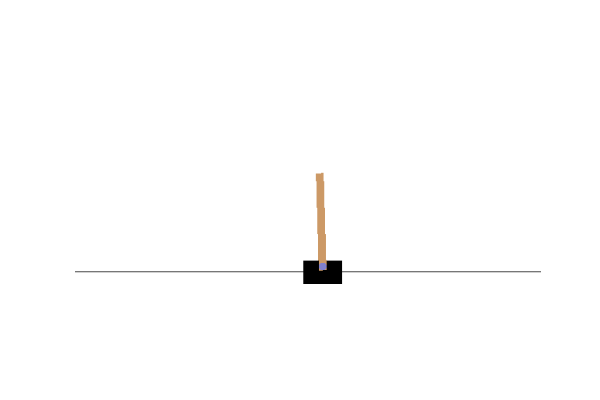
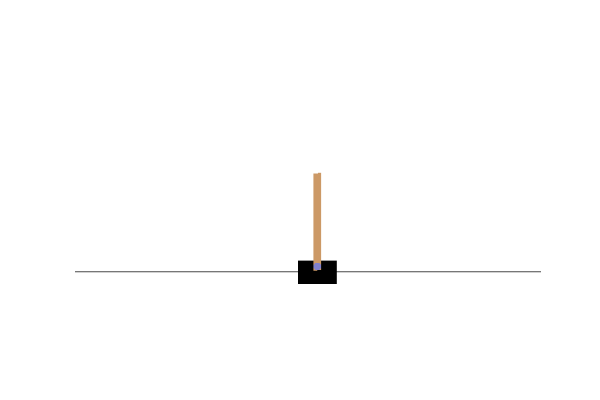
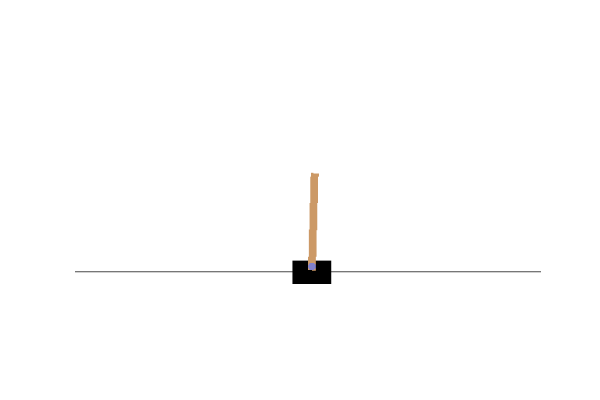
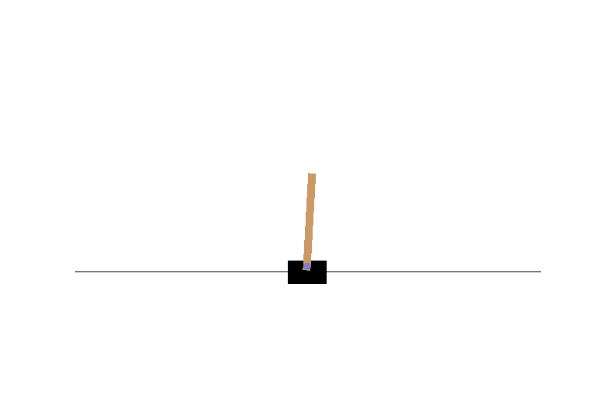
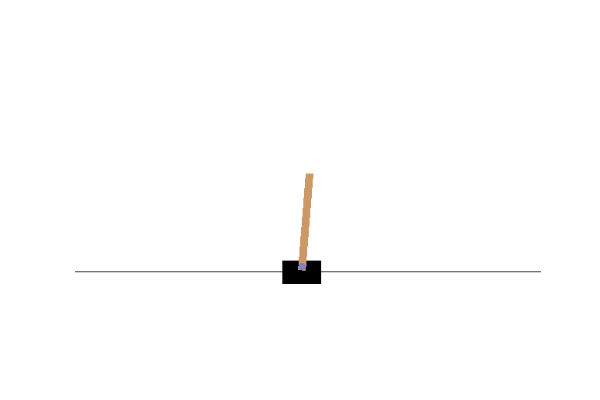
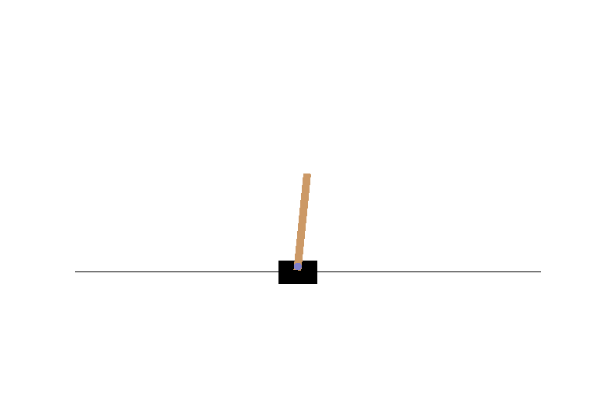
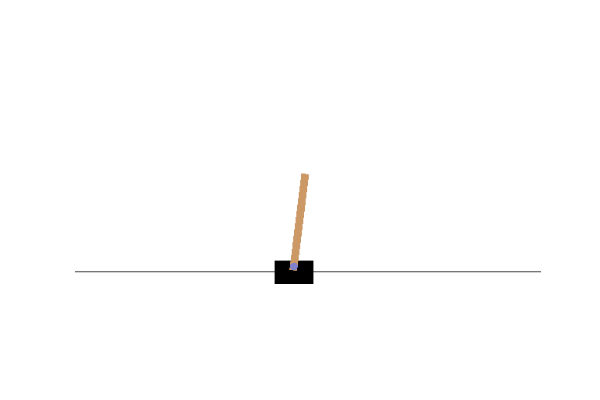
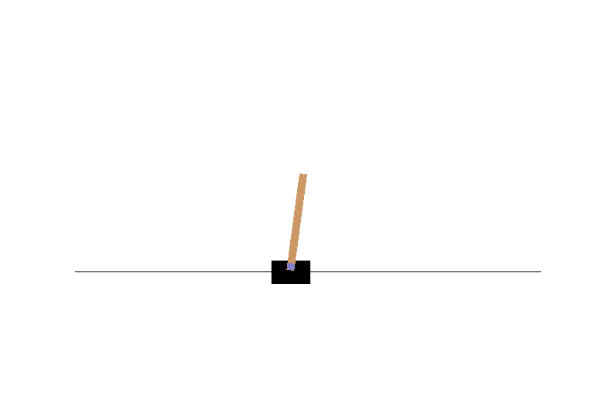
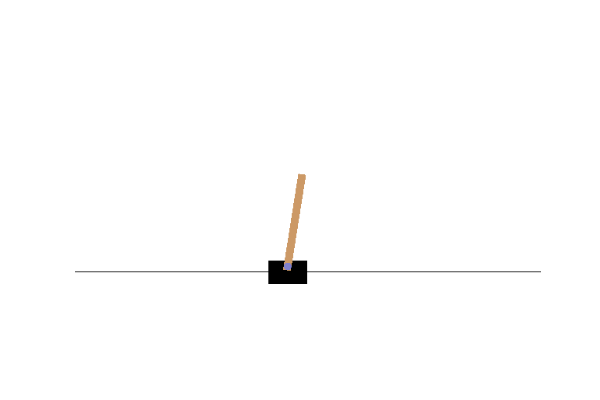
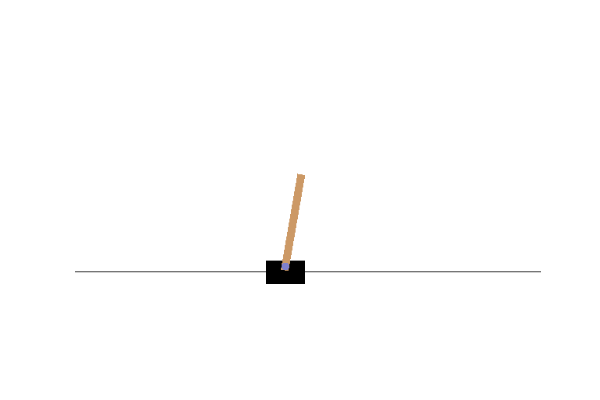
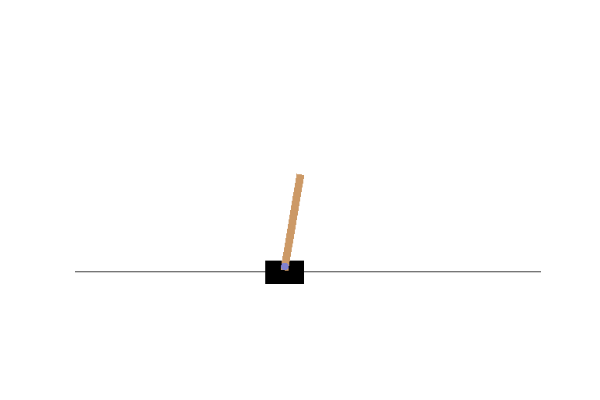
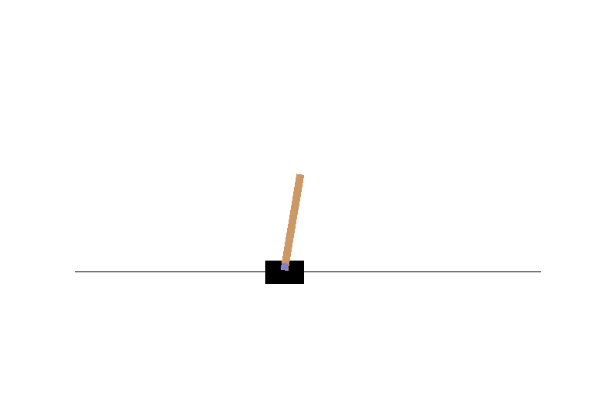
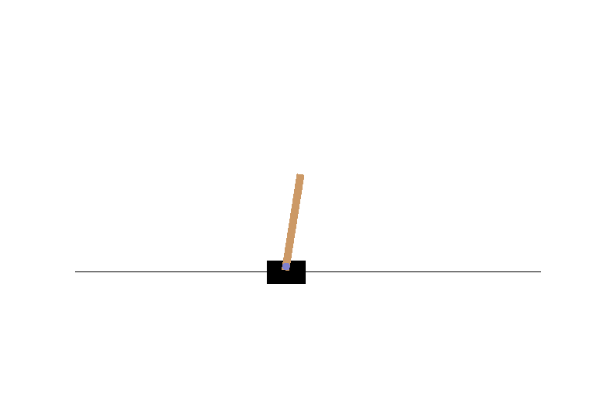
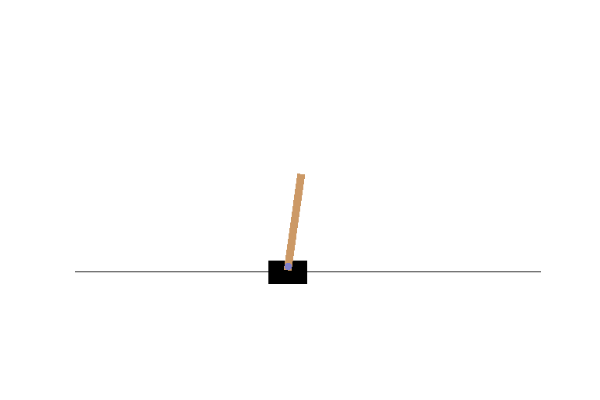
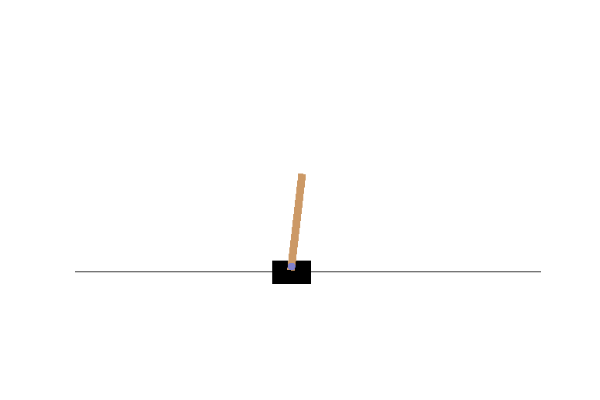
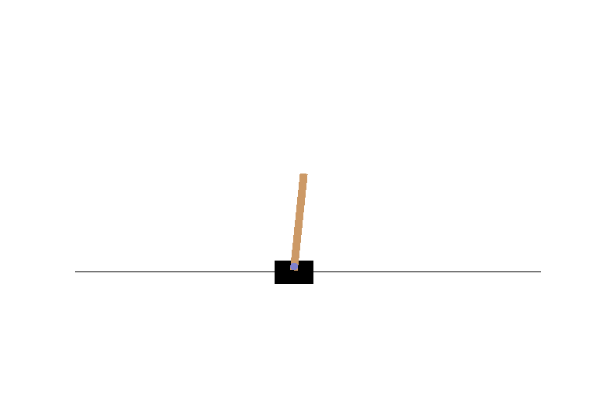
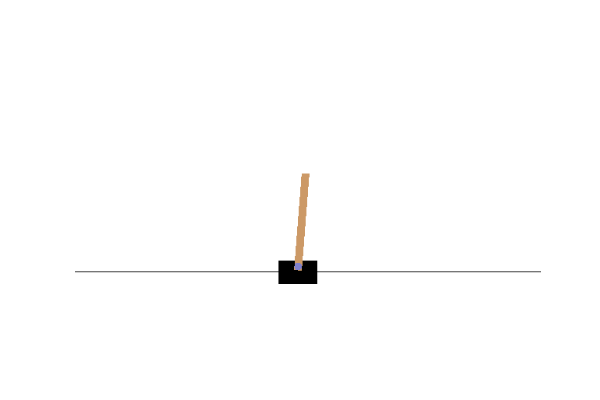
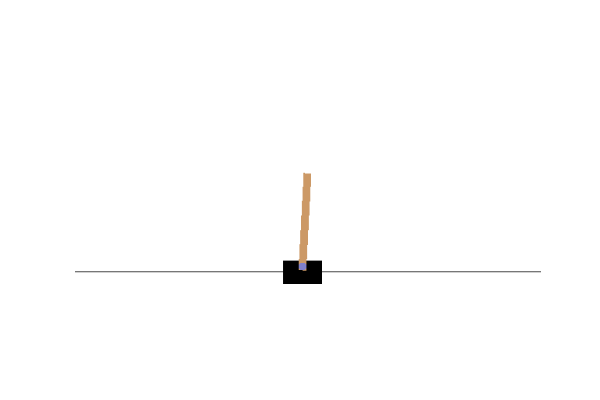
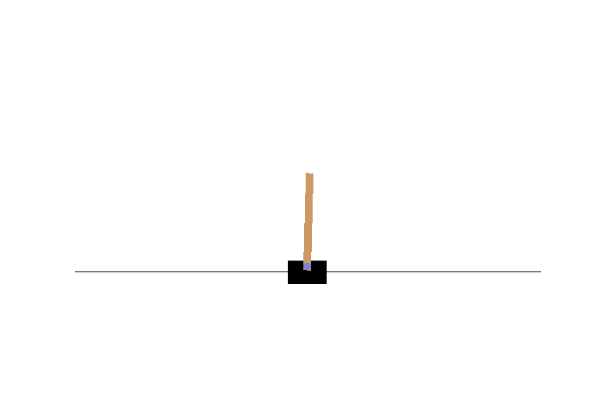
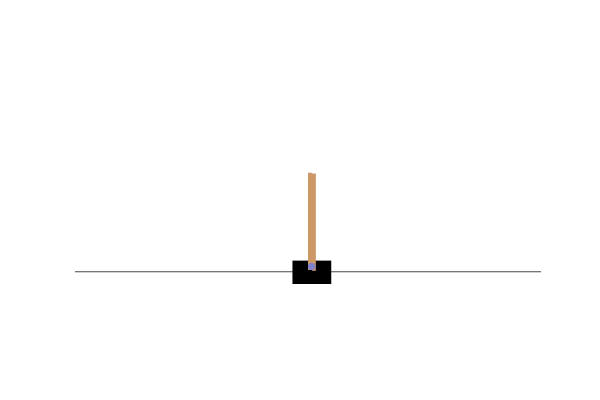
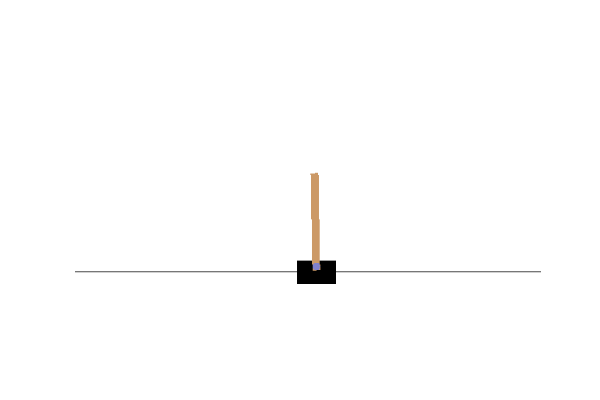
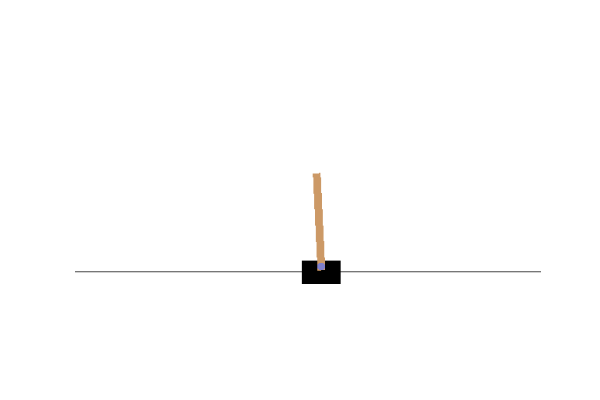
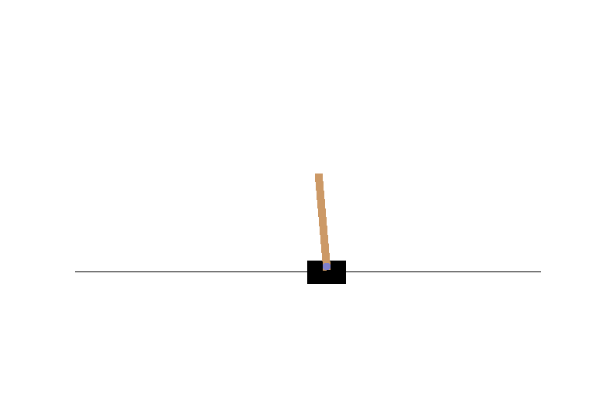
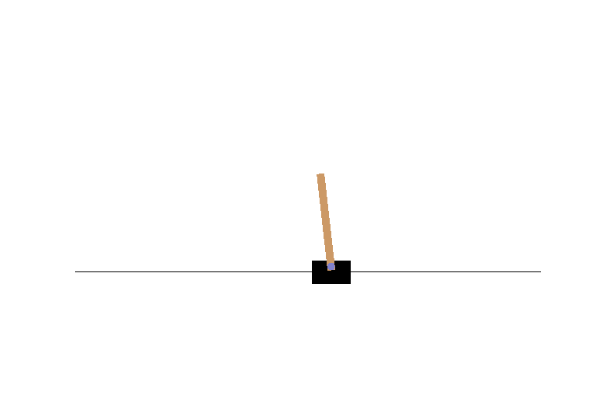
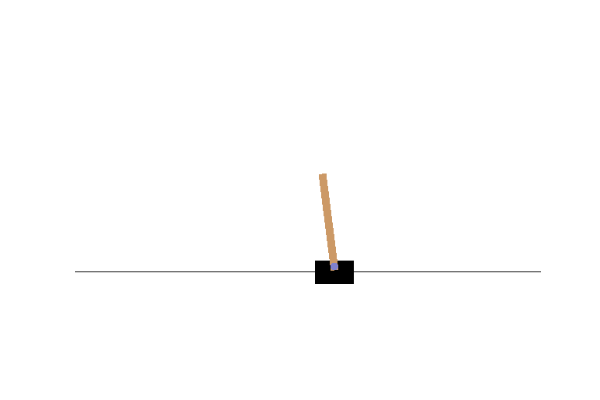
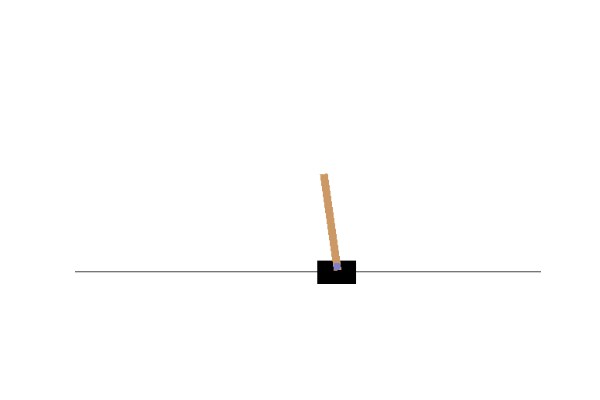
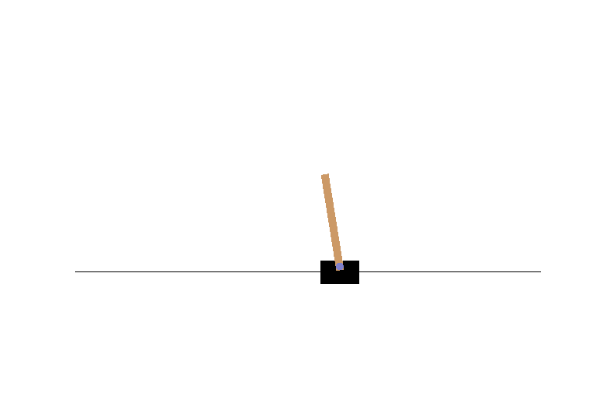
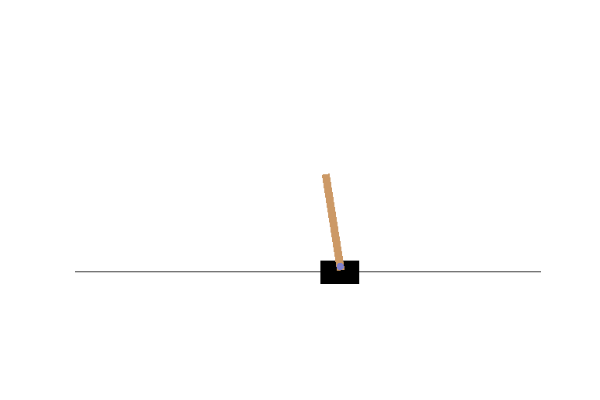
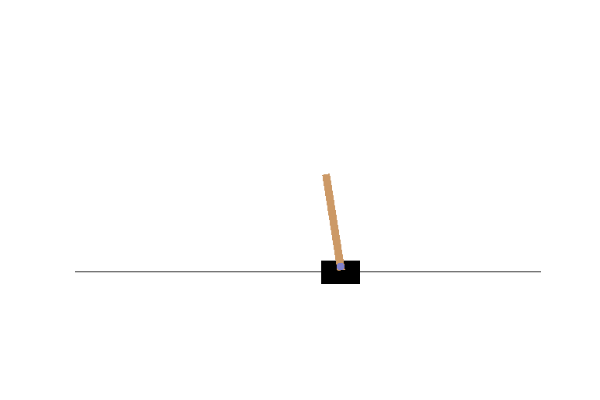
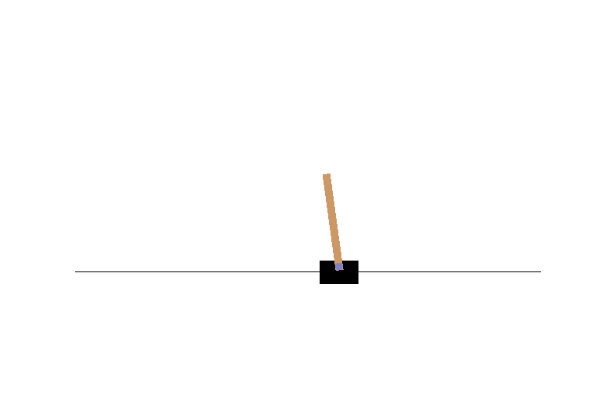
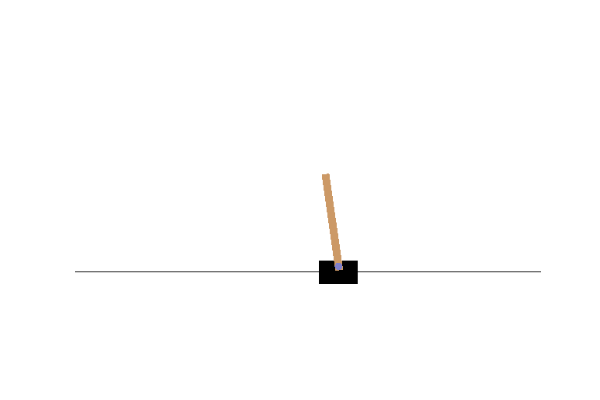
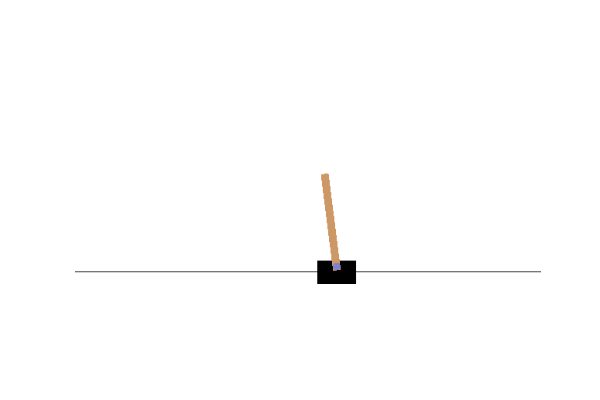
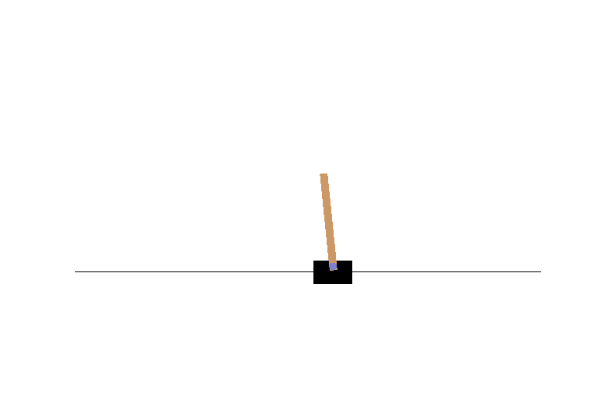
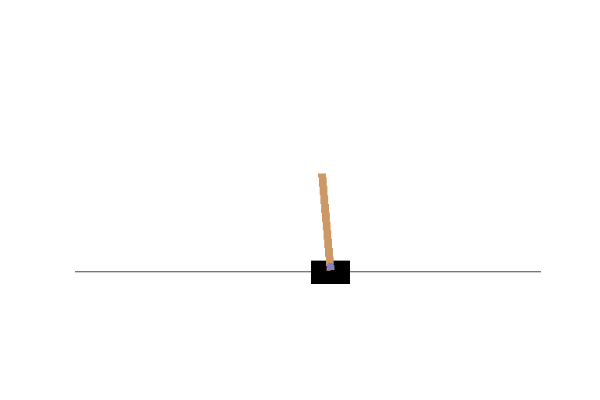
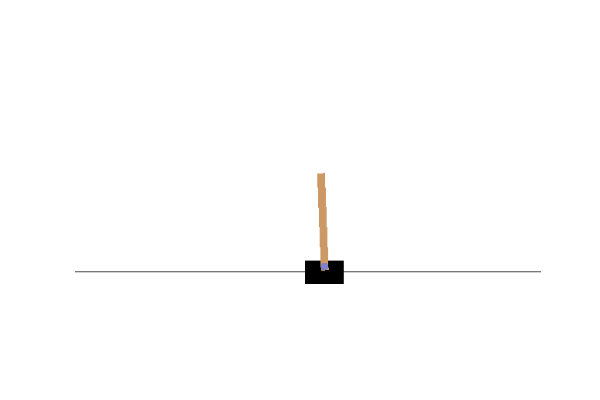
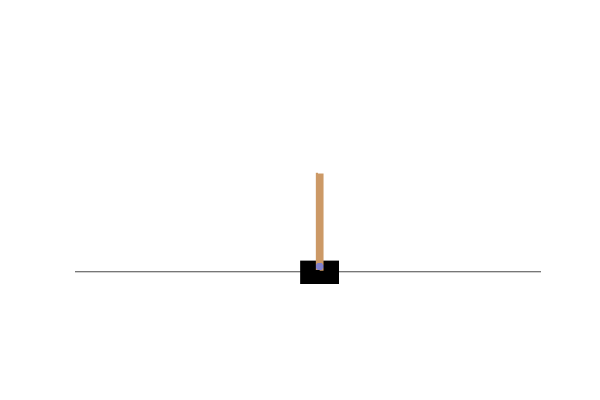
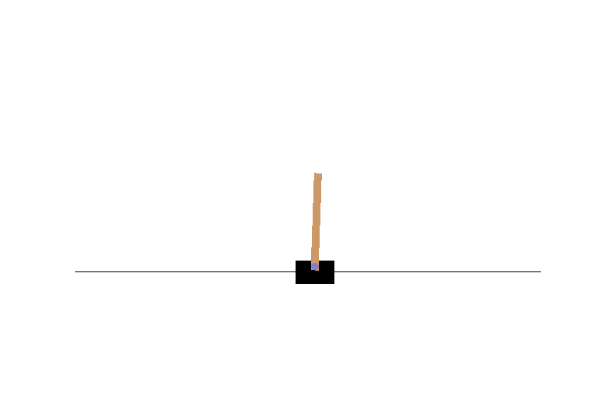
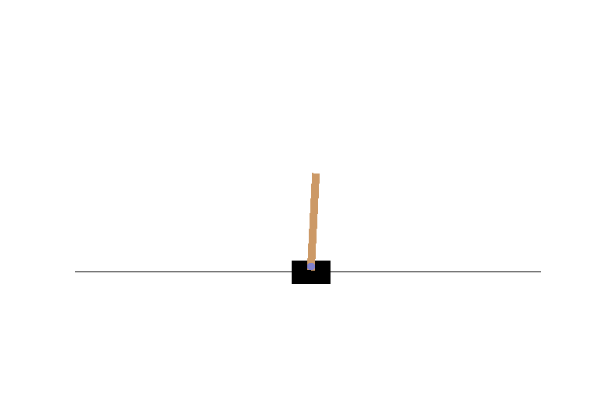
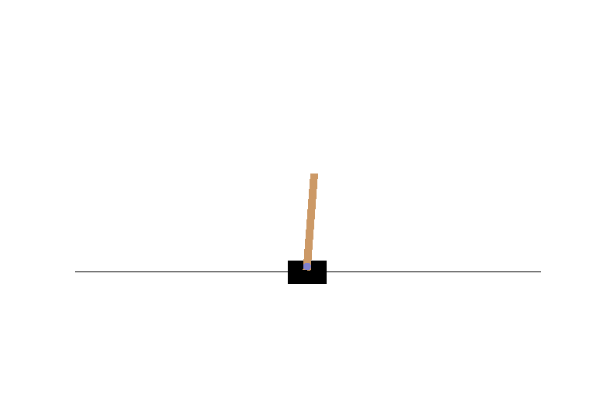
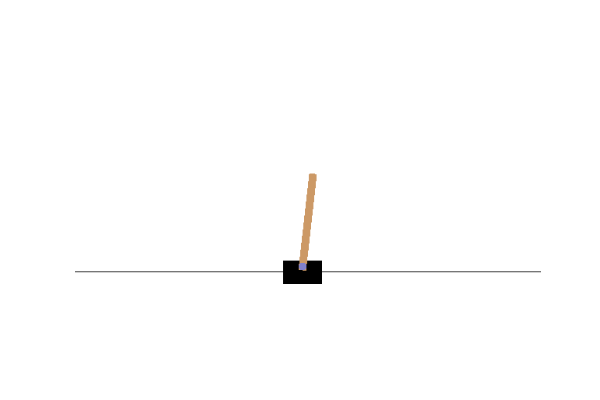
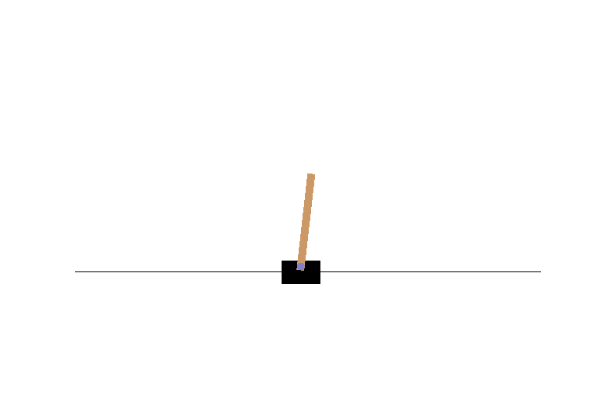
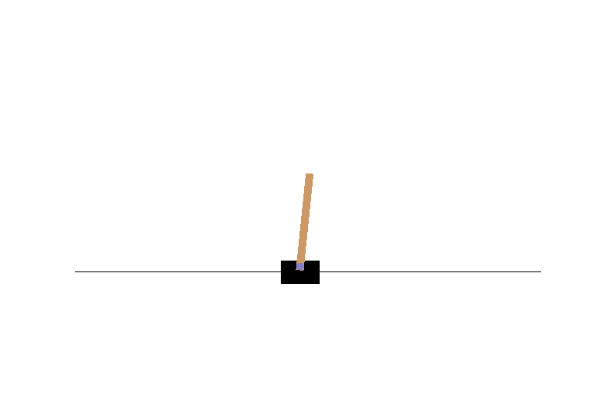
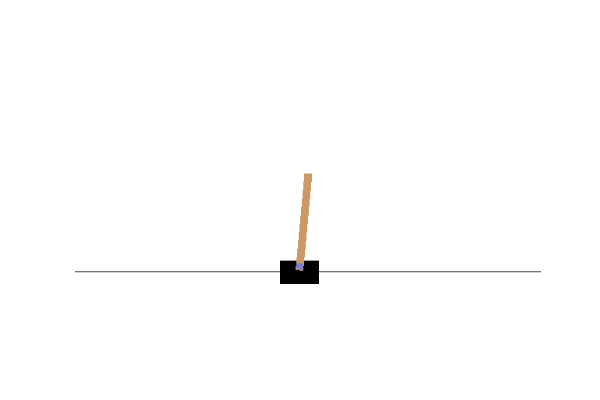

In [5]:
frames, rewards = vpg.plot_episode(500)
print "rewards obtained = {}".format(rewards)
display_frames_as_gif(frames)

### Effect of different batch size

INFO:gym.envs.registration:Making new env: CartPole-v0
[2016-07-30 21:20:30,177] Making new env: CartPole-v0


....running the batch size = 1
....running the batch size = 5
....running the batch size = 20
....running the batch size = 40
....running the batch size = 100


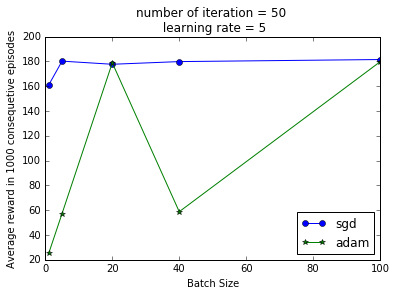

In [21]:
batch_sizes = [1, 5, 20, 40, 100]
n_itr = 50
learning_rate = 5
max_pathlength = 200
env = gym.make('CartPole-v0')
ob_dim = env.observation_space.shape[0]
ac_dim = env.action_space.n
avg_rewards_sgd = []
avg_rewards_adam = []
baseline = None

for batch_size in batch_sizes:    
    print "....running the batch size = {}".format(batch_size)
    #Batch Gradient Descent
    linearPolicy = StochasticLinearPolicy(ob_dim, ac_dim)
    
    vpg_sgd = VPG(env, linearPolicy, baseline, n_itr=n_itr, batch_size=batch_size, 
                  max_pathlength=max_pathlength, learning_rate=learning_rate, gradient_update="sgd")
    vpg_sgd.train()
    avg_rewards_sgd.append(float(vpg_sgd.accuracy(1000).split()[7]))
    
    # ADAM update
    linearPolicy = StochasticLinearPolicy(ob_dim, ac_dim)
    vpg_adam = VPG(env, linearPolicy, baseline, n_itr=n_itr, batch_size=batch_size, 
                  max_pathlength=max_pathlength, learning_rate=learning_rate, gradient_update="adam")
    vpg_adam.train()
    avg_rewards_adam.append(float(vpg_adam.accuracy(1000).split()[7]))

plt.plot(batch_sizes, avg_rewards_sgd, marker = "o")
plt.plot(batch_sizes, avg_rewards_adam, marker = "*")

plt.ylabel("Average reward in 1000 consequetive episodes")
plt.xlabel("Batch Size")
plt.title("number of iteration = {} \n learning rate = {}".format(n_itr, learning_rate))
plt.legend(["sgd", "adam"], loc = "lower right")
    

### Effect of learning rates

INFO:gym.envs.registration:Making new env: CartPole-v0
[2016-07-30 21:31:54,658] Making new env: CartPole-v0


....running the learning_rate = 0.01
....running the learning_rate = 0.1
....running the learning_rate = 0.5
....running the learning_rate = 1
....running the learning_rate = 5
....running the learning_rate = 10


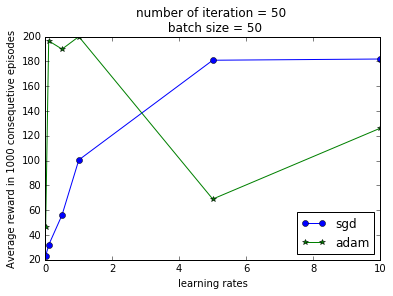

In [22]:
batch_size = 50
n_itr = 50
learning_rates = [0.01, 0.1, 0.5, 1, 5, 10]
max_pathlength = 200
env = gym.make('CartPole-v0')
ob_dim = env.observation_space.shape[0]
ac_dim = env.action_space.n
avg_rewards_sgd = []
avg_rewards_adam = []
baseline = None

for learning_rate in learning_rates:
    print "....running the learning_rate = {}".format(learning_rate)
    
    linearPolicy = StochasticLinearPolicy(ob_dim, ac_dim)    
    vpg_sgd = VPG(env, linearPolicy, baseline, n_itr=n_itr, batch_size=batch_size, 
                  max_pathlength=max_pathlength, learning_rate=learning_rate, gradient_update="sgd")
    vpg_sgd.train()
    avg_rewards_sgd.append(float(vpg_sgd.accuracy(1000).split()[7]))
    
    linearPolicy = StochasticLinearPolicy(ob_dim, ac_dim)
    vpg_adam = VPG(env, linearPolicy, baseline, n_itr=n_itr, batch_size=batch_size, 
                  max_pathlength=max_pathlength, learning_rate=learning_rate, gradient_update="adam")
    vpg_adam.train()
    avg_rewards_adam.append(float(vpg_adam.accuracy(1000).split()[7]))


plt.plot(learning_rates, avg_rewards_sgd, marker = "o")
plt.plot(learning_rates, avg_rewards_adam, marker = "*")

plt.ylabel("Average reward in 1000 consequetive episodes")
plt.xlabel("learning rates")
plt.title("number of iteration = {} \n batch size = {}".format(n_itr, batch_size))
plt.legend(["sgd", "adam"],  loc = "lower right")

### Effect of number of iterations

INFO:gym.envs.registration:Making new env: CartPole-v0
[2016-07-30 21:38:45,995] Making new env: CartPole-v0


....running the n_itr = 1
....running the n_itr = 10
....running the n_itr = 50
....running the n_itr = 100


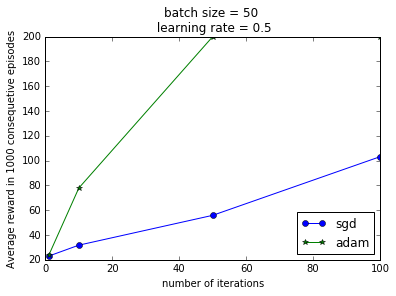

In [23]:
batch_size = 50
n_itrs = [1, 10, 50, 100]
learning_rate = 0.5
max_pathlength = 200
env = gym.make('CartPole-v0')
ob_dim = env.observation_space.shape[0]
ac_dim = env.action_space.n
avg_rewards_sgd = []
avg_rewards_adam = []
baseline = None 

for n_itr in n_itrs:    
    print "....running the n_itr = {}".format(n_itr)
    #Batch Gradient Descent
    linearPolicy = StochasticLinearPolicy(ob_dim, ac_dim)    
    vpg_sgd = VPG(env, linearPolicy, baseline, n_itr=n_itr, batch_size=batch_size, 
                  max_pathlength=max_pathlength, learning_rate=learning_rate, gradient_update="sgd")
    vpg_sgd.train()
    avg_rewards_sgd.append(float(vpg_sgd.accuracy(1000).split()[7]))
    
    # ADAM update
    linearPolicy = StochasticLinearPolicy(ob_dim, ac_dim)
    vpg_adam = VPG(env, linearPolicy, baseline, n_itr=n_itr, batch_size=batch_size, 
                  max_pathlength=max_pathlength, learning_rate=learning_rate, gradient_update="adam")
    vpg_adam.train()
    avg_rewards_adam.append(float(vpg_adam.accuracy(1000).split()[7]))

plt.plot(n_itrs, avg_rewards_sgd, marker = "o")
plt.plot(n_itrs, avg_rewards_adam, marker = "*")

plt.ylabel("Average reward in 1000 consequetive episodes")
plt.xlabel("number of iterations")
plt.title("batch size = {} \n learning rate = {}".format(batch_size, learning_rate))
plt.legend(["sgd", "adam"], loc = "lower right")
    

## Baseline

### Effect of batch size

INFO:gym.envs.registration:Making new env: CartPole-v0
[2016-07-30 20:58:21,528] Making new env: CartPole-v0


....running the batch size = 1
....running the batch size = 5
....running the batch size = 20
....running the batch size = 40
....running the batch size = 100


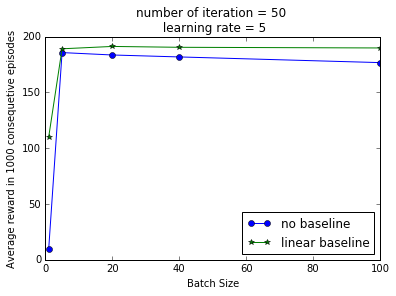

In [17]:
batch_sizes = [1, 5, 20, 40, 100]
n_itr = 50
learning_rate = 5
max_pathlength = 200
env = gym.make('CartPole-v0')
ob_dim = env.observation_space.shape[0]
ac_dim = env.action_space.n
avg_rewards_no_baseline = []
avg_rewards_linear_baseline = []

for batch_size in batch_sizes:    
    print "....running the batch size = {}".format(batch_size)
    # No baseline
    linearPolicy = StochasticLinearPolicy(ob_dim, ac_dim)
    baseline = None
    vpg_no_baseline = VPG(env, linearPolicy, baseline, n_itr=n_itr, batch_size=batch_size, 
                  max_pathlength=max_pathlength, learning_rate=learning_rate, gradient_update="sgd")
    vpg_no_baseline.train()
    avg_rewards_no_baseline.append(float(vpg_no_baseline.accuracy(1000).split()[7]))
    
    # Linear Baseline
    linearPolicy = StochasticLinearPolicy(ob_dim, ac_dim)
    baseline = LinearFeatureBaseline_rllab()
    vpg_linear_baseline = VPG(env, linearPolicy, baseline, n_itr=n_itr, batch_size=batch_size, 
                  max_pathlength=max_pathlength, learning_rate=learning_rate, gradient_update="sgd")
    vpg_linear_baseline.train()
    avg_rewards_linear_baseline.append(float(vpg_linear_baseline.accuracy(1000).split()[7]))

plt.plot(batch_sizes, avg_rewards_no_baseline, marker = "o")
plt.plot(batch_sizes, avg_rewards_linear_baseline, marker = "*")

plt.ylabel("Average reward in 1000 consequetive episodes")
plt.xlabel("Batch Size")
plt.title("number of iteration = {} \n learning rate = {}".format(n_itr, learning_rate))
plt.legend(["no baseline", "linear baseline"], loc = "lower right")
    

rewards obtained = 200.0



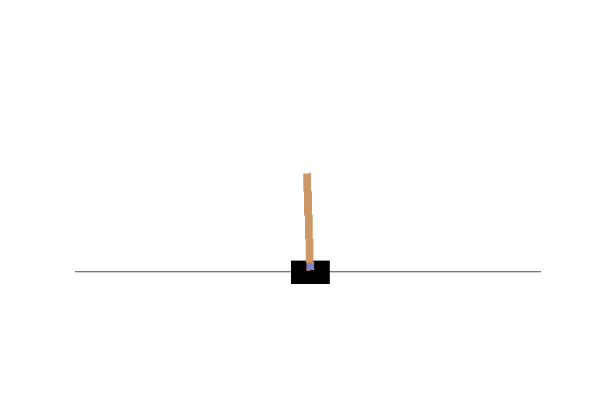
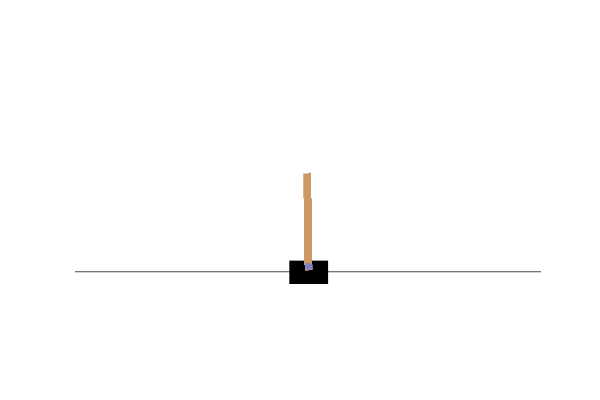
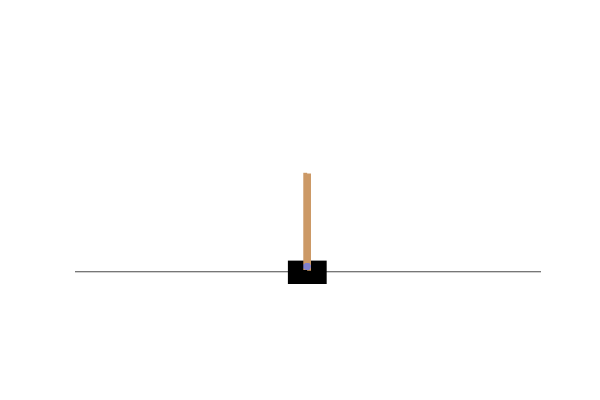
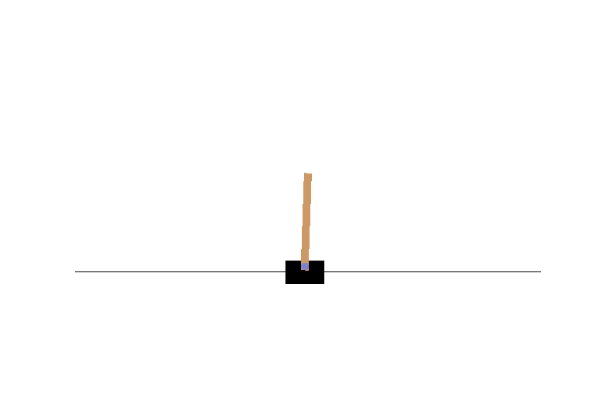
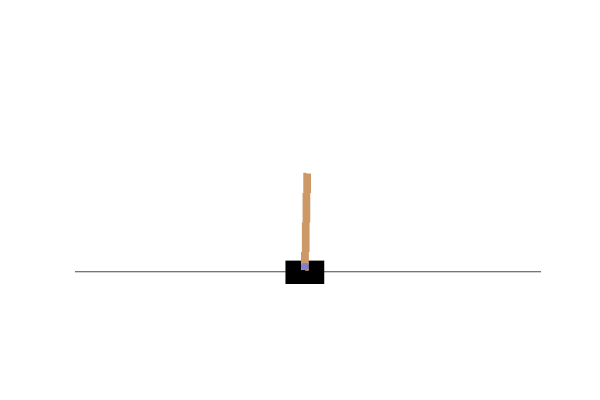
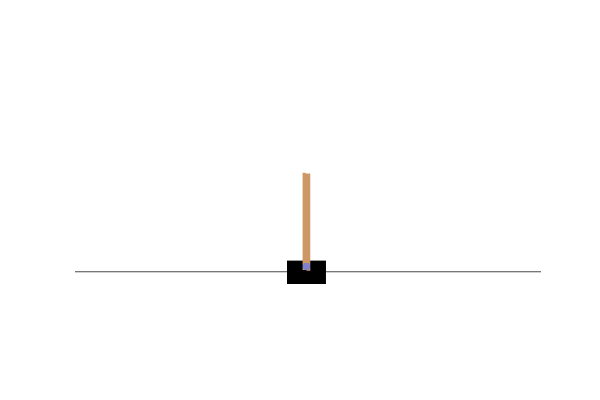
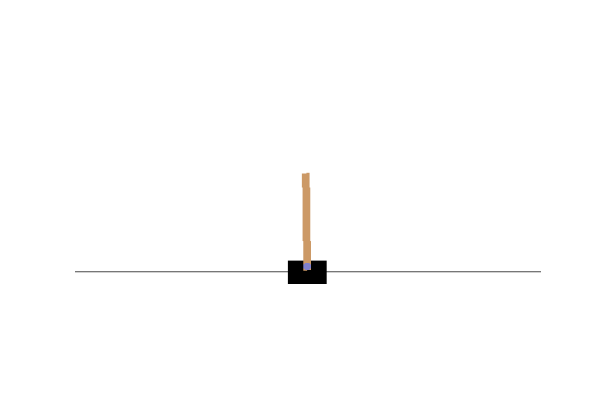
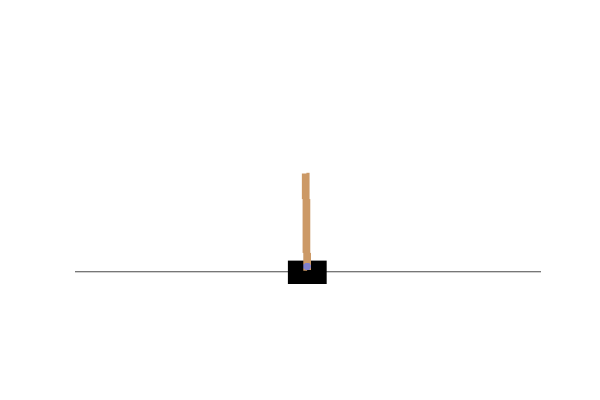
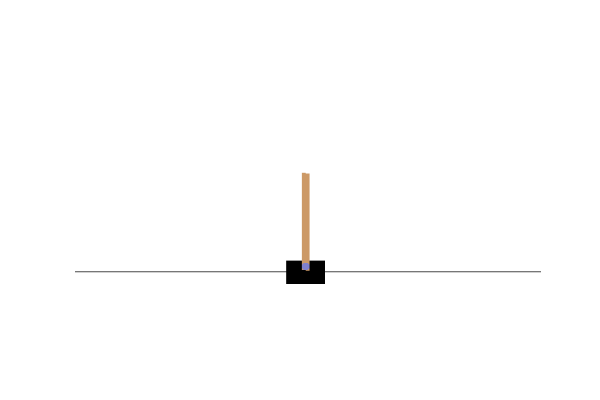
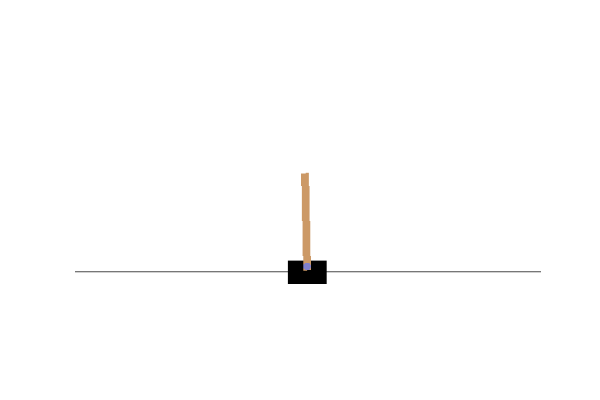
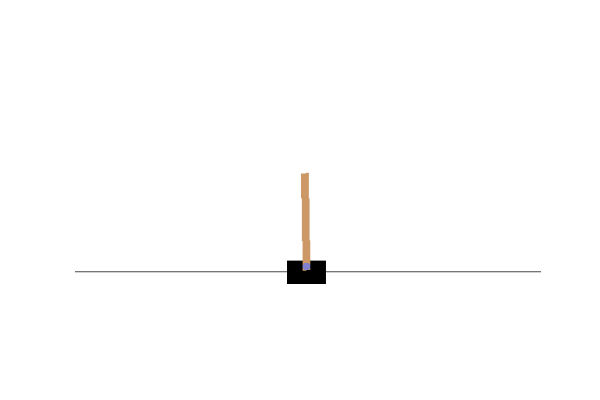
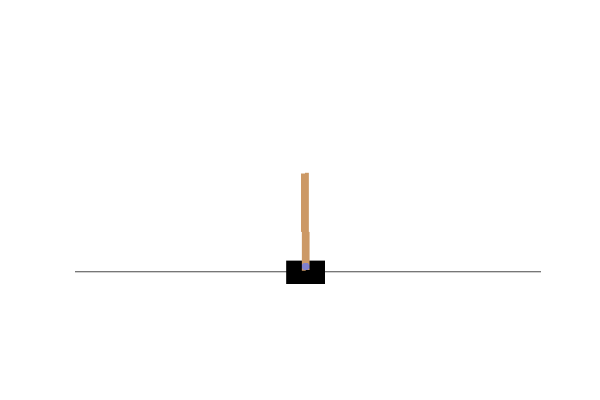
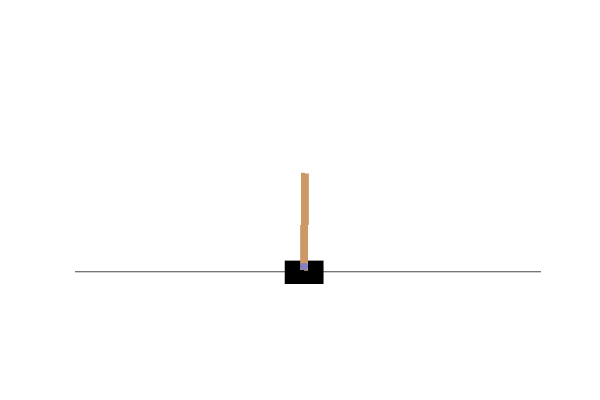
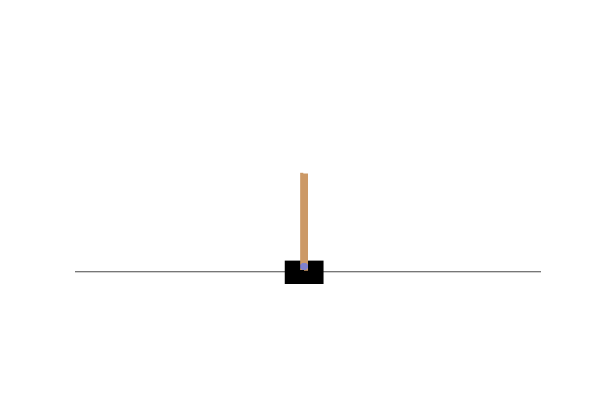
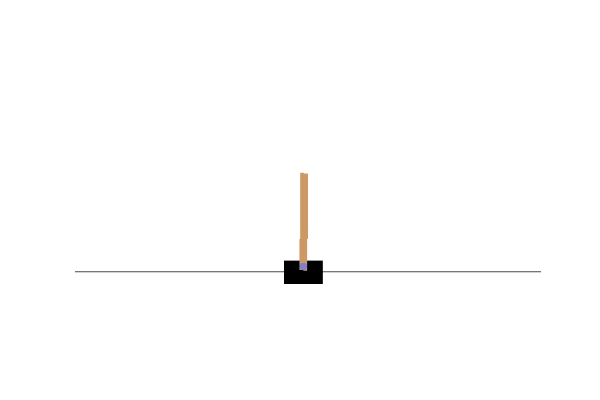
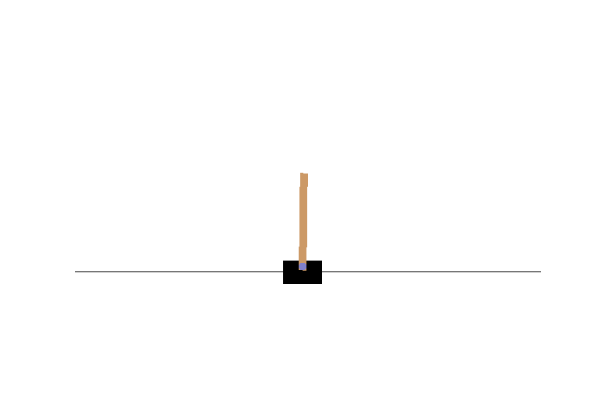
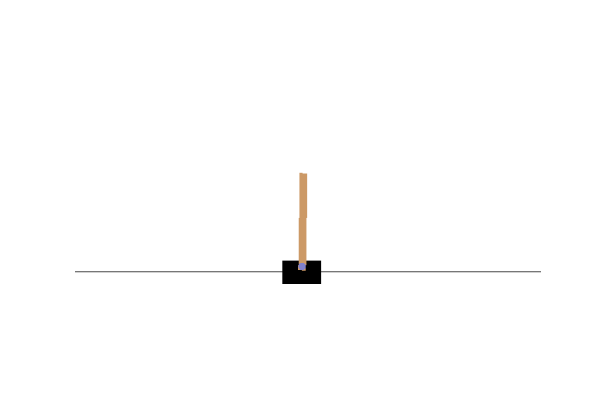
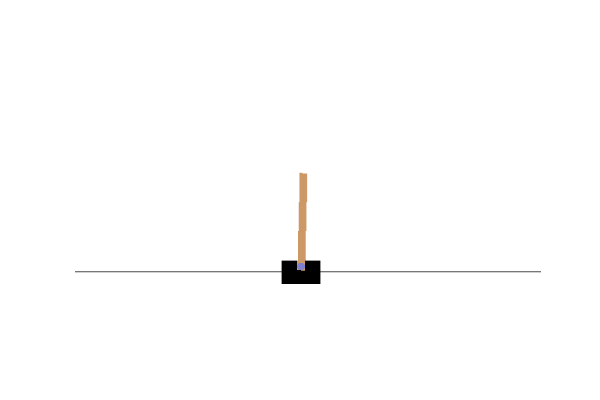
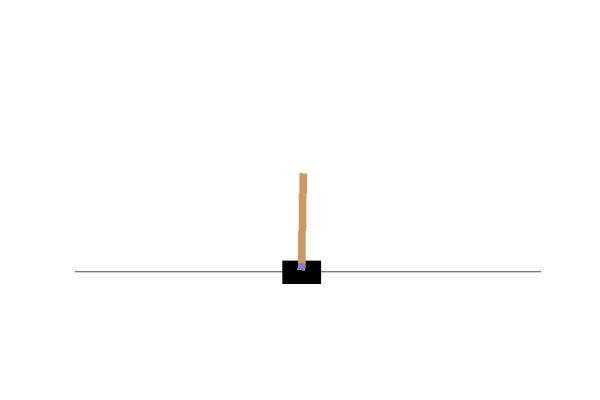
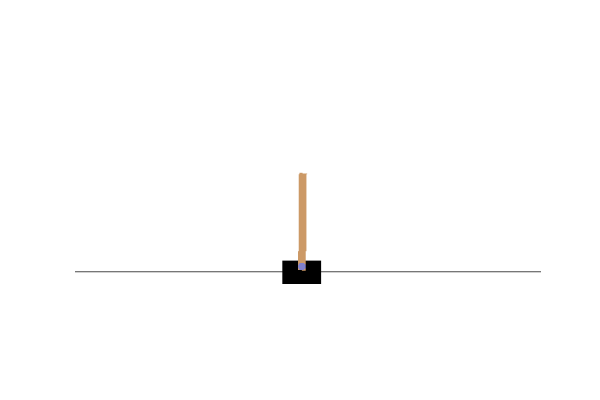
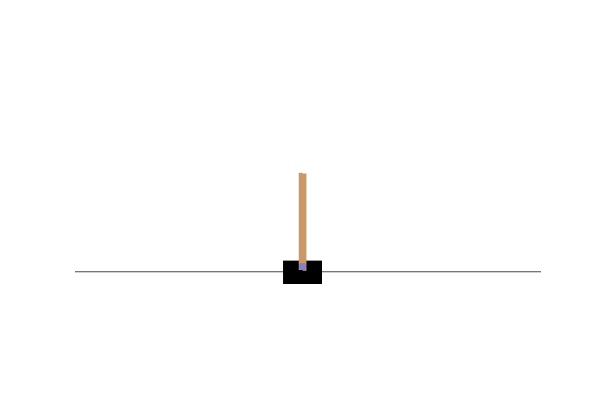
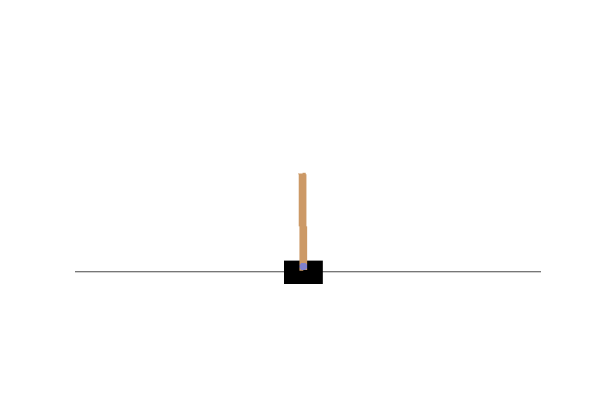
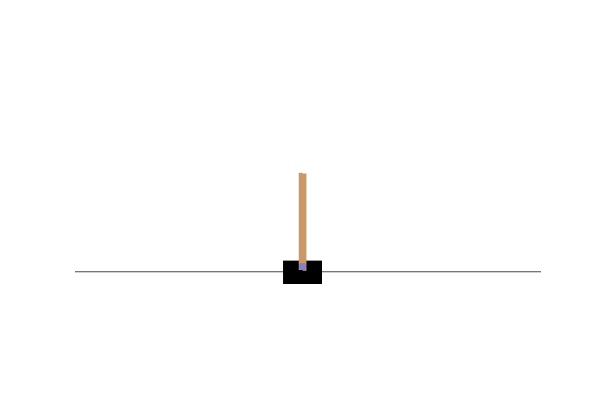
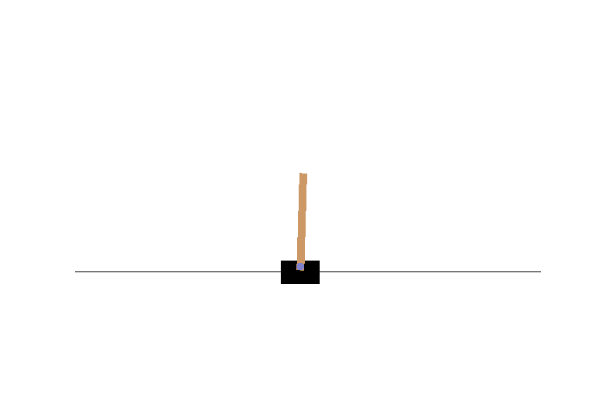
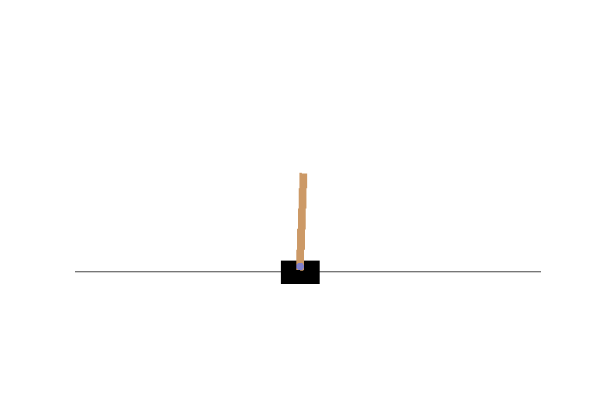
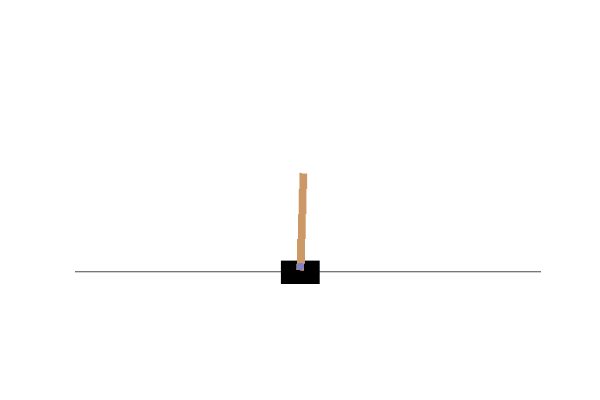
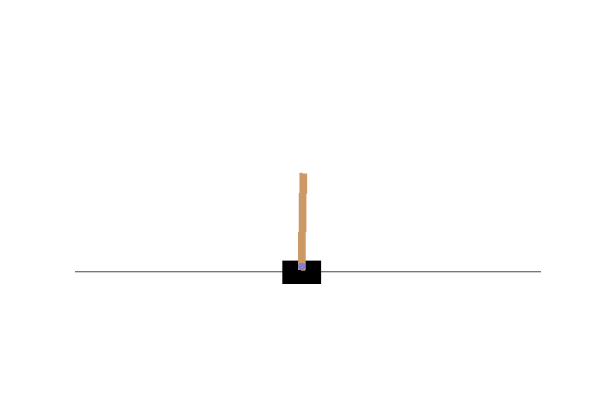
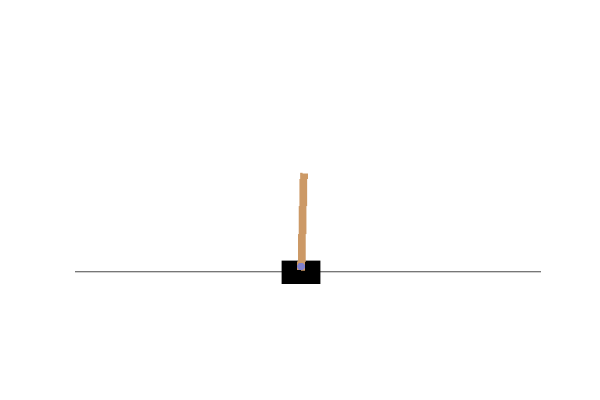
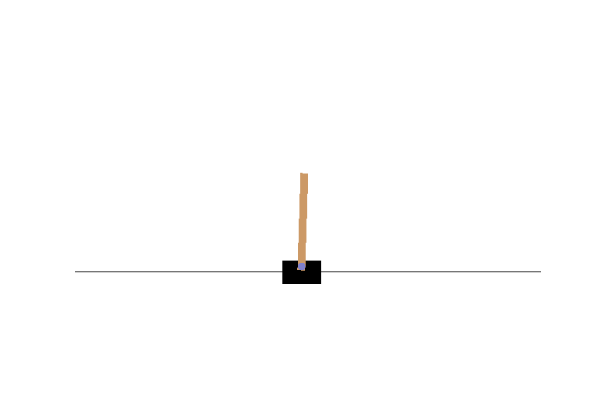
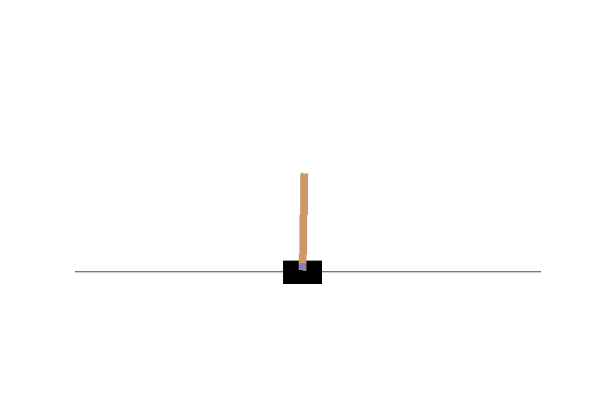
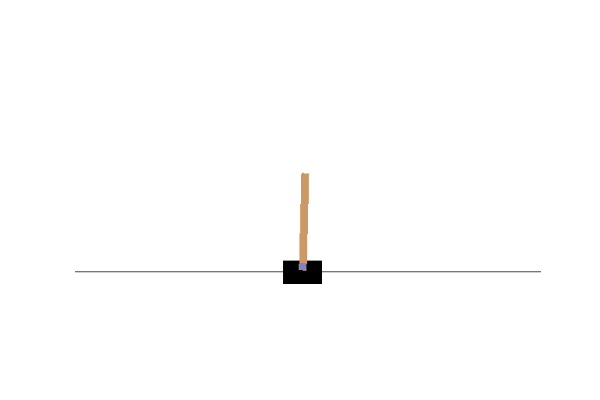
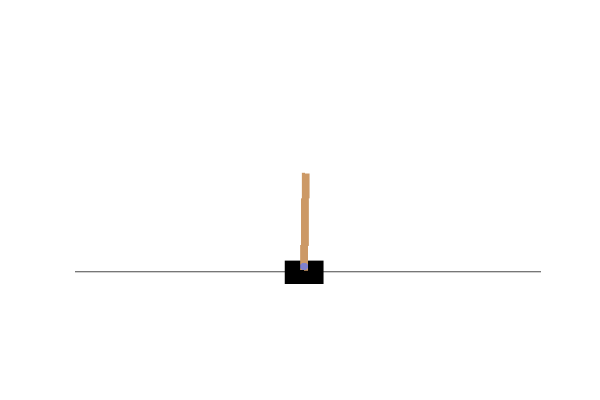
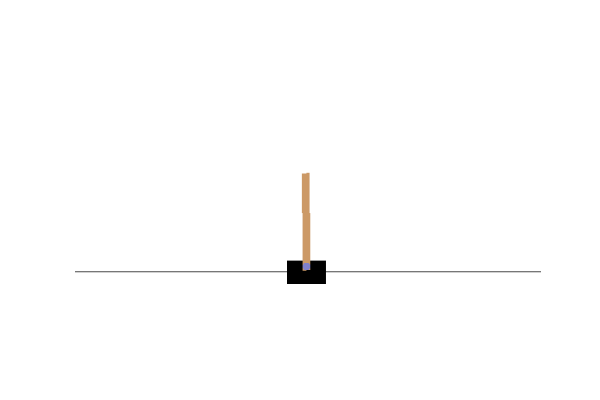
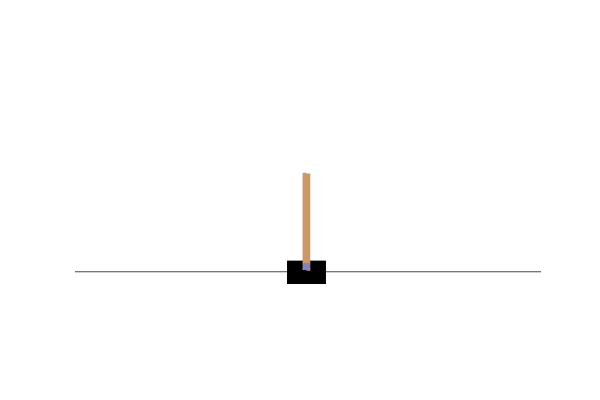
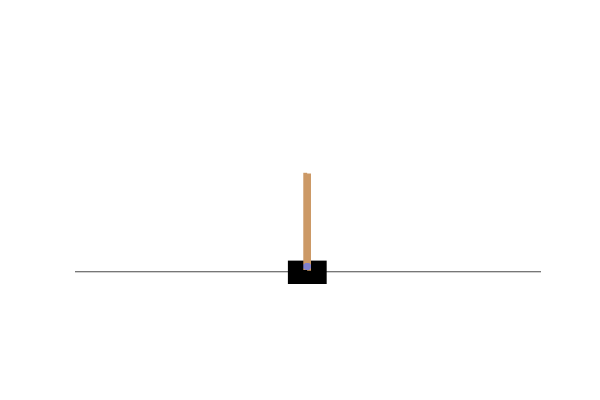
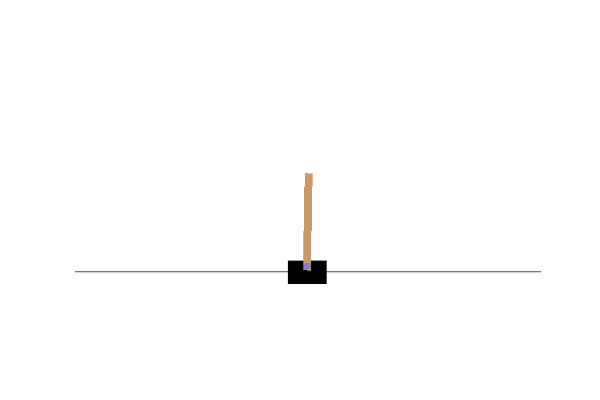
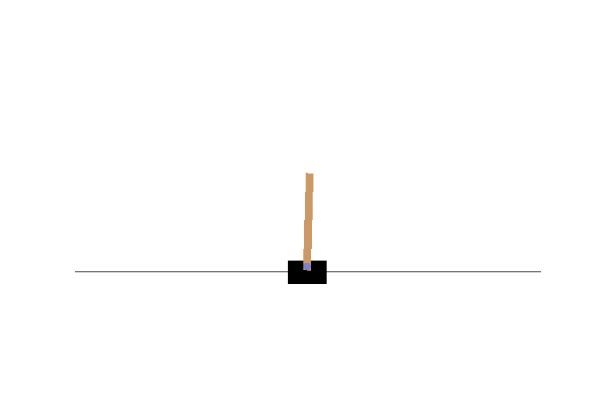
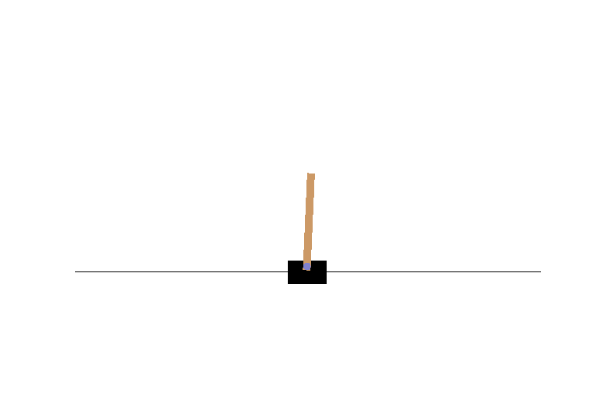
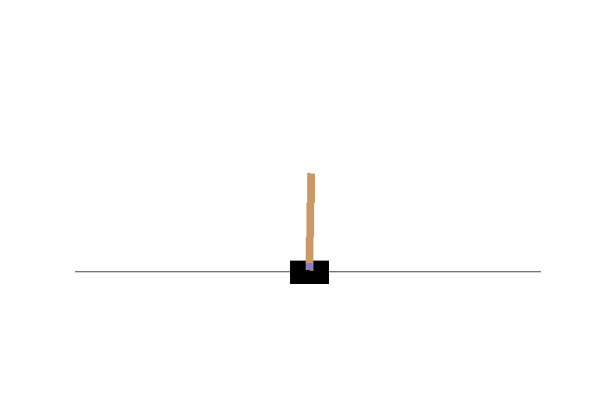
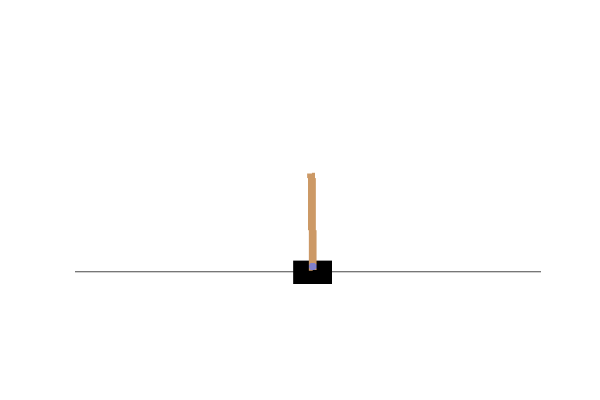
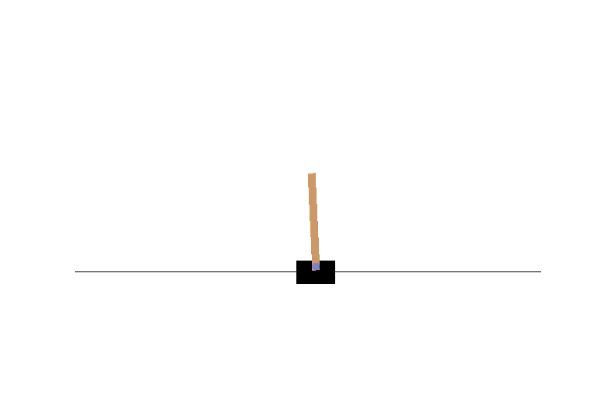
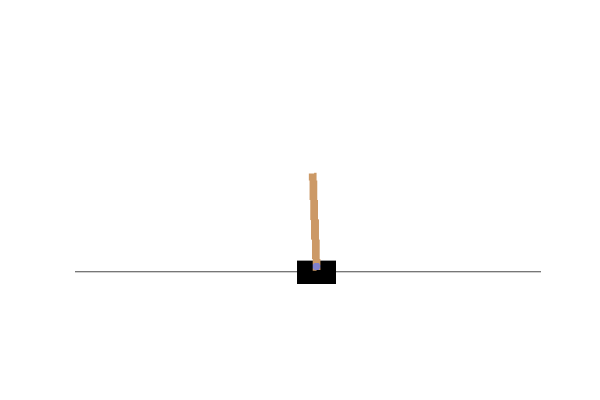
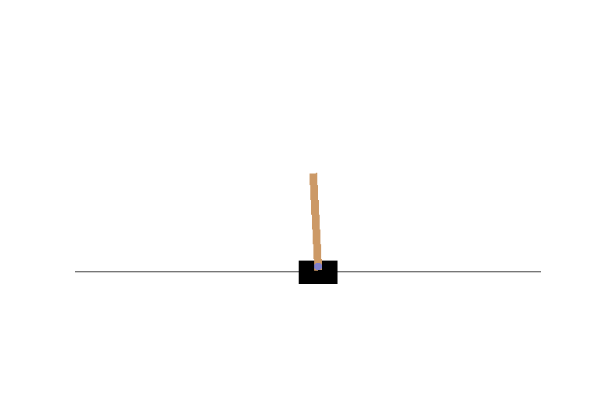
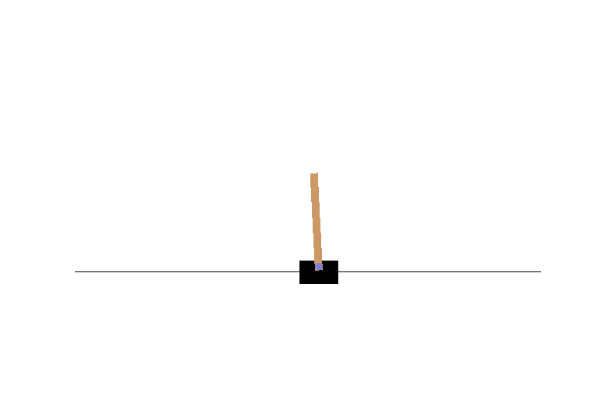
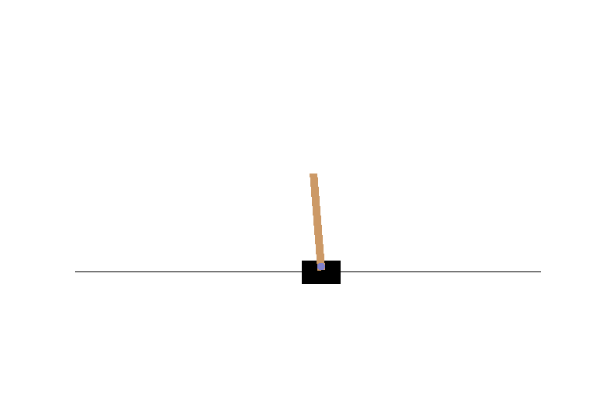
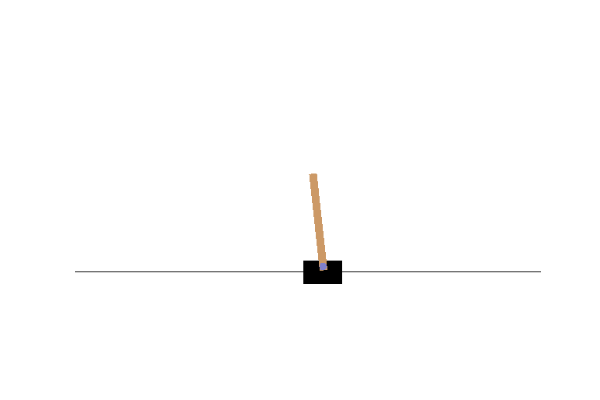
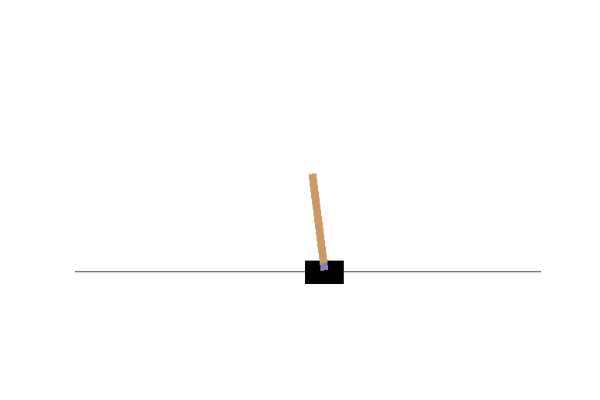
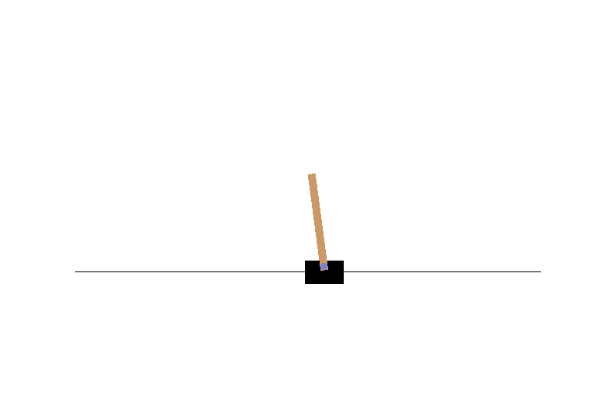
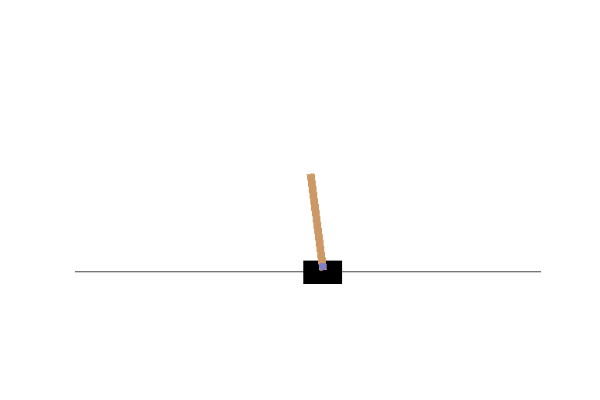
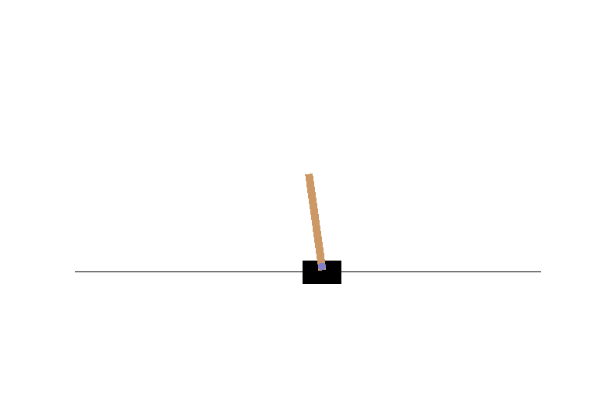
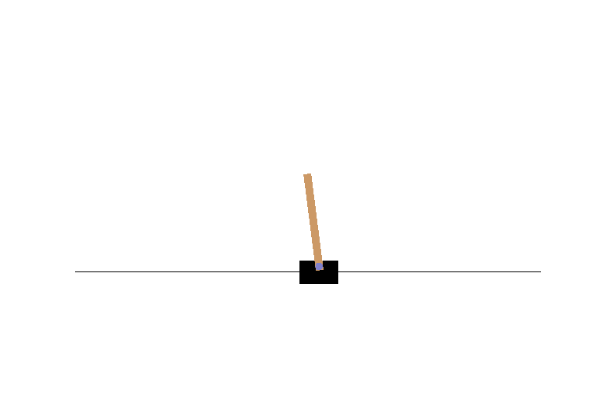
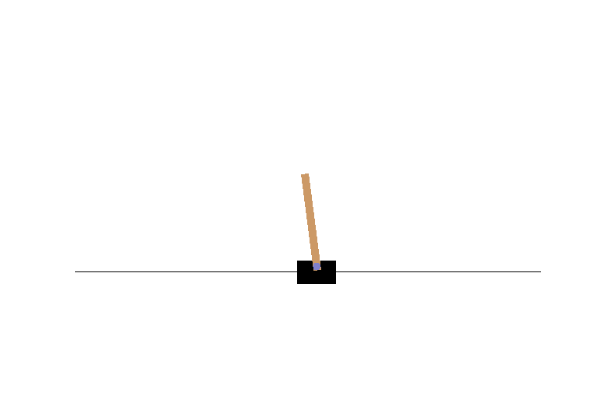
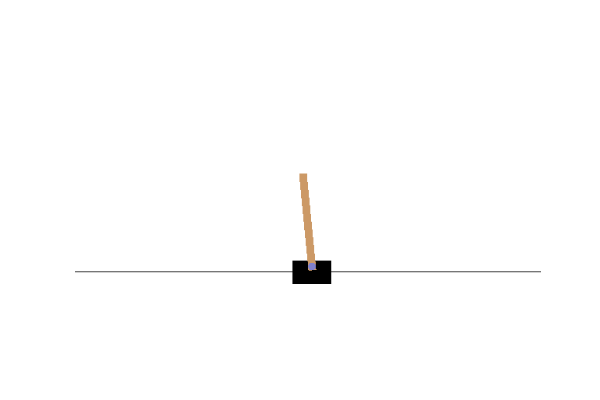
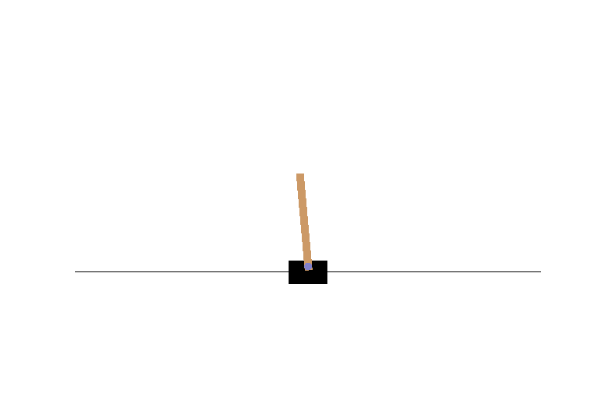
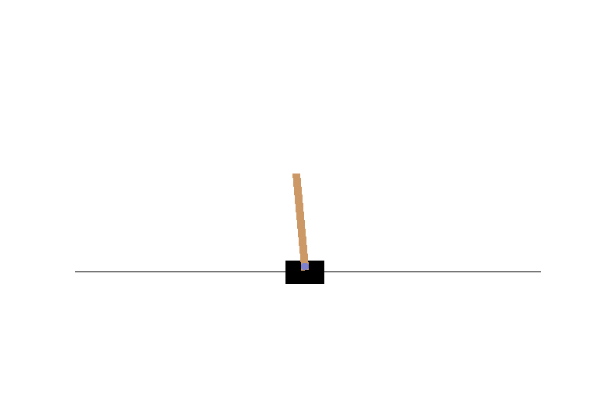
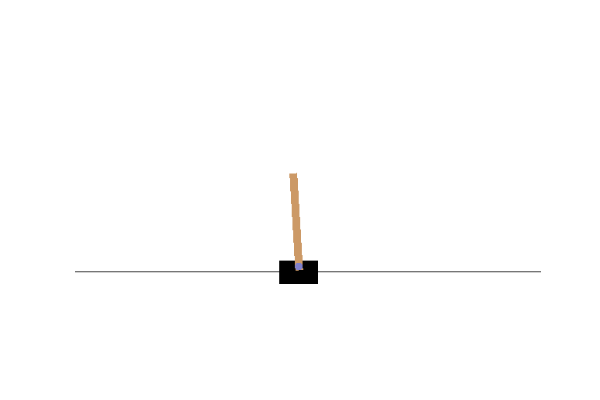
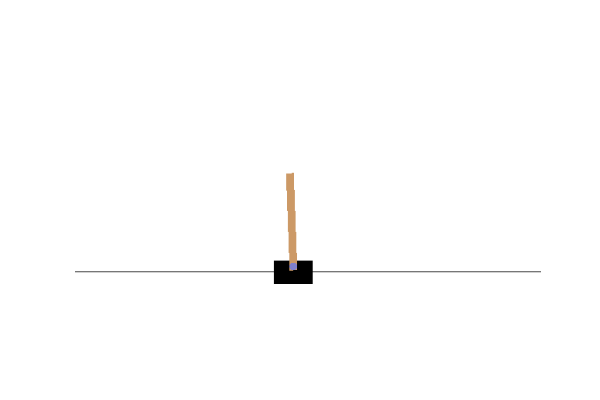
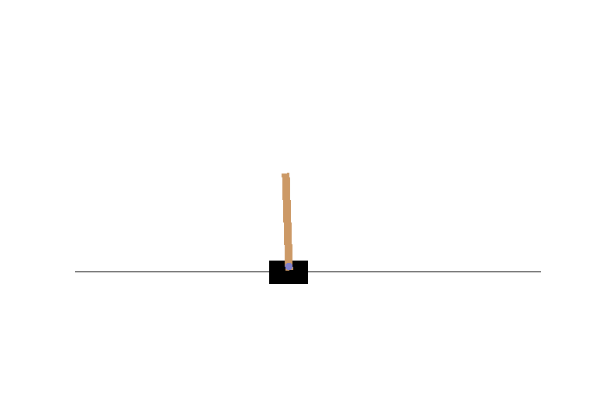
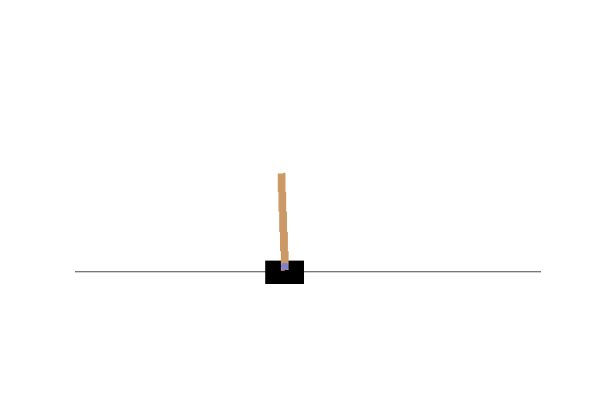
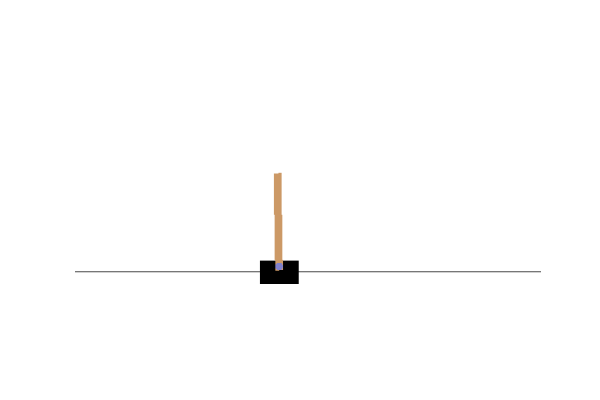
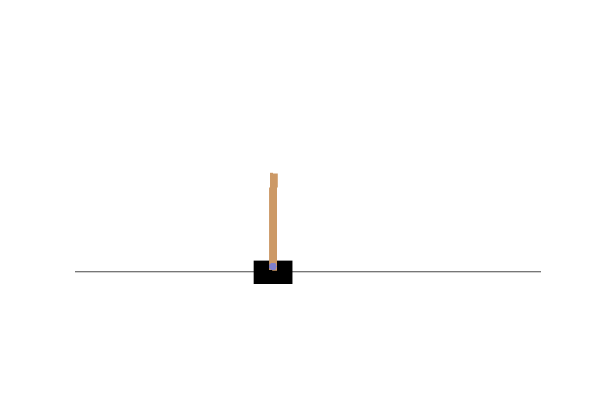
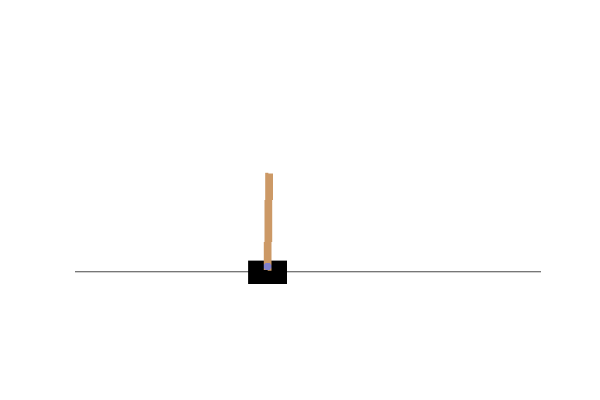
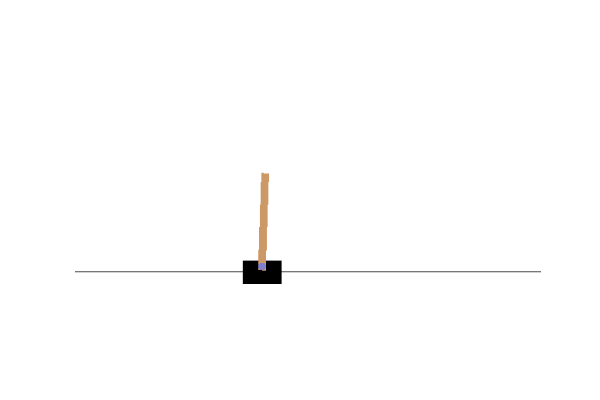
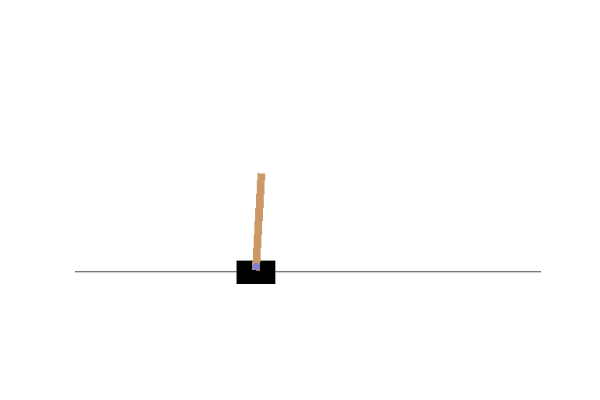
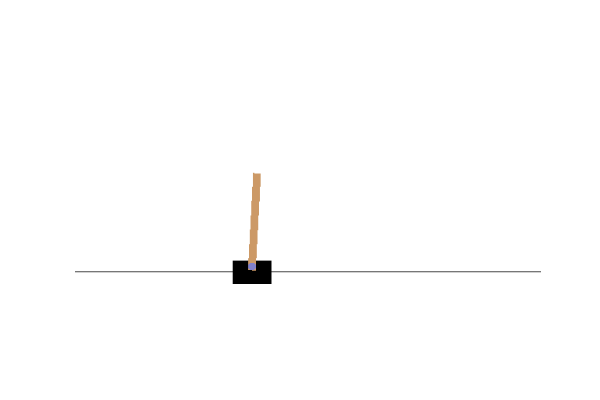
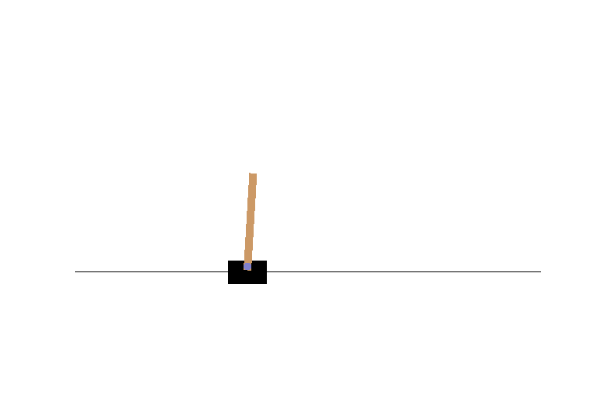
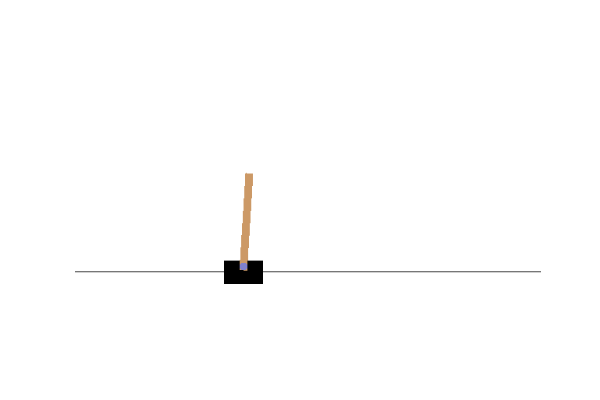

In [18]:
frames, rewards = vpg_linear_baseline.plot_episode(200)
print "rewards obtained = {}".format(rewards)
display_frames_as_gif(frames)